In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings('ignore')
plt.style.use('matplot-config/rosepine.mplstyle')
# plt.style.use('rosepine.mplstyle')
%matplotlib inline

In [2]:
# Path to the font file
font_path = 'fonts/SourceCodePro-Regular.otf'

# Register the font with Matplotlib
fm.fontManager.addfont(font_path)

# Get the font's family name
font_prop = fm.FontProperties(fname=font_path)

font_family = font_prop.get_name()  # This retrieves the font name for use in rcParams
plt.rcParams['font.family'] = font_family # Set custom font family globally
plt.rcParams['text.color'] = '#767190'
plt.rcParams['axes.labelcolor'] = '#767190'  # Set axis label color
plt.rcParams['axes.titlecolor'] = '#767190'  # Set title color
plt.rcParams['xtick.color'] = '#767190'  # Set x-tick color
plt.rcParams['ytick.color'] = '#767190'  # Set y-tick color
plt.rcParams['legend.fontsize'] = 18  # Set global font size for legend
plt.rcParams['axes.titlesize'] = 18  # Set global font size for labels and titles
# plt.rcParams['font.size'] = 14  # Set global font size for labels and titles
plt.rcParams['axes.labelsize'] = 18
# Set global font size for tick labels (both x and y)
plt.rcParams['xtick.labelsize'] = 14  # Set font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 14  # Set font size for y-tick labels

In [3]:
# Function to create a pie chart with global text styling
def styled_pie_chart(ax, data, **kwargs):
    # Set the default color palette to 'bright'
    colors = sns.color_palette('bright')
    
    pie_wedges, pie_texts, autotexts = ax.pie(
        data,
        autopct='%1.1f%%',
        textprops={'color': 'black'},  # Inside text color
        colors=colors,  # Set the default color palette to 'bright'
        **kwargs
    )
    # Customize outside labels separately
    for text in pie_texts:  # Outside label texts
        text.set_color('#767190')  # Adjust outside label color

    return pie_wedges, pie_texts, autotexts


def save_plot_with_border(fig, plot_name):
    # Adjust layout to ensure space for the border
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Leave space for border

    # Add a rounded rectangle border around the entire figure (with border-radius)
    rounded_border = patches.FancyBboxPatch(
        (0, 0), 1, 1, transform=fig.transFigure, color='#1e1c2e', 
        linewidth=5, edgecolor='black', fill=False, 
        boxstyle="round,pad=0.1,rounding_size=-0.03", zorder=10
    )
    fig.patches.append(rounded_border)

    # Adjust Layout
    plt.tight_layout()

    # Save the figure
    plt.savefig(plot_name, dpi=300, bbox_inches='tight')

## 1. Understanding the data

In [4]:
df = pd.read_csv('data/transaction_data.csv')
df.head()

,First Name,Last Name,Email,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status
0,Cristi,Jerrome,cjerrome0@deviantart.com,Agender,32,115.186.14.16,Afghanistan,09/08/2022,Eva,$124.48,Stripe,BRONZE
1,Bowie,Agge,bagge1@hubpages.com,Male,24,58.229.97.212,Sierra Leone,29/12/2022,STL 1,$694.88,Stripe,BRONZE
2,Griz,Slayford,gslayford2@weebly.com,Male,24,33.120.228.123,Armenia,24/10/2022,Eva,$441.05,Credit Card,GOLD
3,Erika,Matelaitis,ematelaitis3@com.com,Female,21,43.21.47.25,Armenia,24/08/2023,Eva,$453.79,Stripe,IRON
4,Nester,Paulon,npaulon4@wix.com,Male,27,99.160.35.96,Armenia,01/05/2023,STL 1,$287.75,Stripe,BRONZE


In [5]:
df.shape

(600, 12)

In [6]:
df.columns

Index(['First Name', 'Last Name', 'Email', 'Gender', 'Age', 'IP Address',
       'Location', 'Date of Transaction', 'Service Used', 'Transaction Amount',
       'Payment Method', 'Membership Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   First Name           600 non-null    object
 1   Last Name            600 non-null    object
 2   Email                600 non-null    object
 3   Gender               600 non-null    object
 4   Age                  600 non-null    int64 
 5   IP Address           600 non-null    object
 6   Location             600 non-null    object
 7   Date of Transaction  600 non-null    object
 8   Service Used         600 non-null    object
 9   Transaction Amount   600 non-null    object
 10  Payment Method       600 non-null    object
 11  Membership Status    600 non-null    object
dtypes: int64(1), object(11)
memory usage: 56.4+ KB


In [8]:
# Remove the dollar sign and convert the column to float
df['Transaction Amount'] = df['Transaction Amount'].replace('[\$,]', '', regex=True).astype(float)

In [9]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'], format='mixed')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   First Name           600 non-null    object        
 1   Last Name            600 non-null    object        
 2   Email                600 non-null    object        
 3   Gender               600 non-null    object        
 4   Age                  600 non-null    int64         
 5   IP Address           600 non-null    object        
 6   Location             600 non-null    object        
 7   Date of Transaction  600 non-null    datetime64[ns]
 8   Service Used         600 non-null    object        
 9   Transaction Amount   600 non-null    float64       
 10  Payment Method       600 non-null    object        
 11  Membership Status    600 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 56.4+ KB


In [11]:
# Splitting the data into Numerical Features and Categorical Features
num_features = df.select_dtypes('number').columns.to_list()

cat_features = df.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Catgorical Features : {cat_features}')

Numerical Features : ['Age', 'Transaction Amount']
Catgorical Features : ['First Name', 'Last Name', 'Email', 'Gender', 'IP Address', 'Location', 'Service Used', 'Payment Method', 'Membership Status']


## 2. Statistical Analysis

### Numerical Features
- 'Age'
- 'Transaction Amount'

In [12]:
df[['Age', 'Transaction Amount']].describe().round(2)

,Age,Transaction Amount
count,600.00,600.00
mean,25.27,659.87
std,4.34,322.42
min,18.00,100.21
25%,22.00,364.99
50%,25.00,649.76
75%,29.00,942.41
max,32.00,1198.88


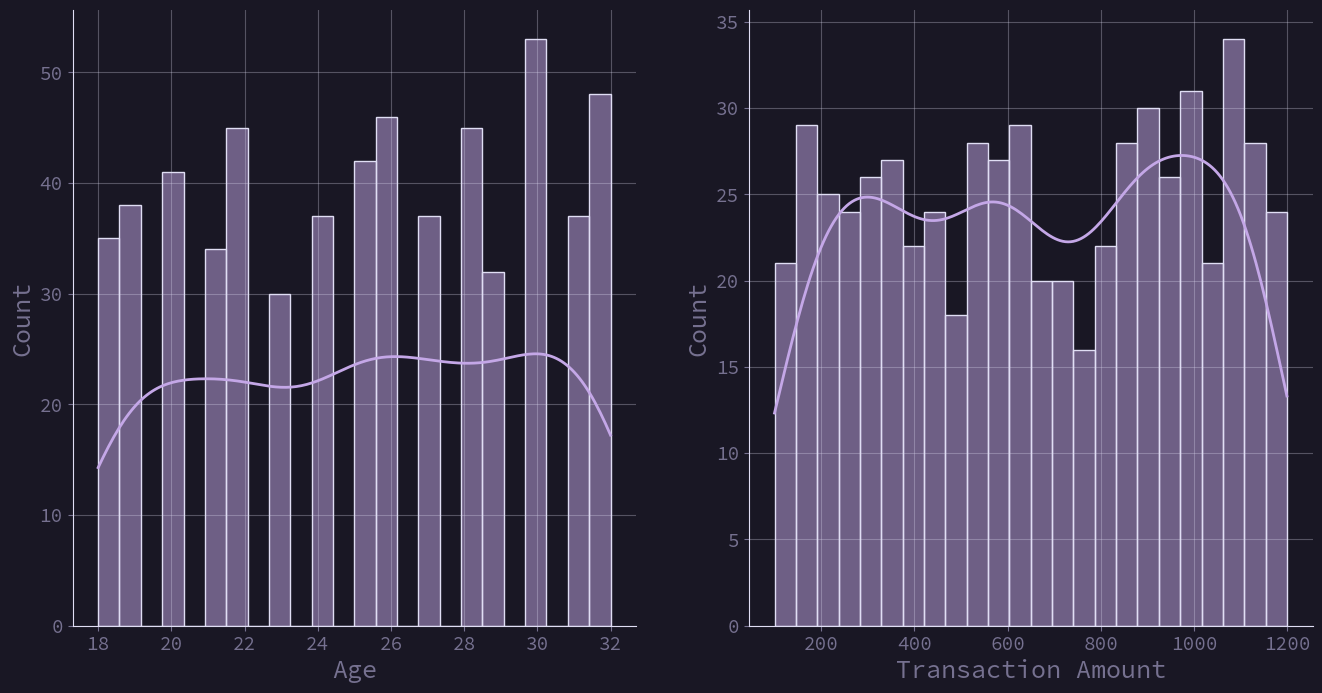

In [13]:
columns = ['Age', 'Transaction Amount']
plt.figure(figsize=(16, 8))
for i, col in enumerate(columns):
    plt.subplot(1,2,i+1)
    sns.histplot(data=df, x = col, kde=True, bins = round(np.sqrt(len(df))))

plt.show()

### Categorical Features
- 'First Name'
- 'Last Name'
- 'Email'
- 'Gender'
- 'IP Address'
- 'Location'
- 'Service Used'
- 'Payment Method'
- 'Membership Status'

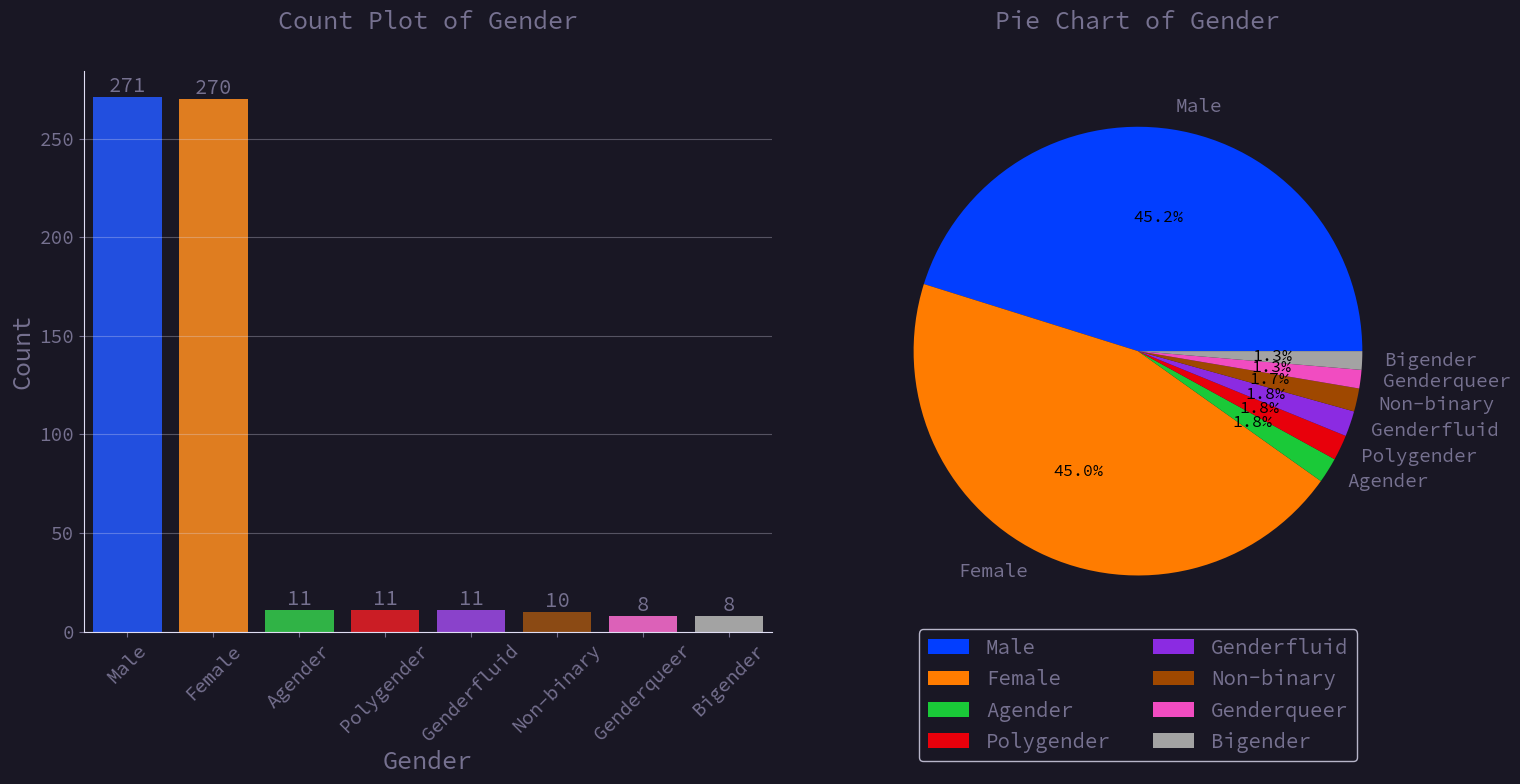

In [14]:
# Set the global color palette for Seaborn
colors = sns.set_palette('bright')

# Sample data
gender_counts = df['Gender'].value_counts().sort_values(ascending=False)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axs[0], palette='bright')
for index, value in enumerate(gender_counts.values):
    axs[0].text(index, value, str(value), ha='center', va='bottom', fontsize=15)

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].set_title('Count Plot of Gender', pad=30)

# Use the styled_pie_chart function for the pie chart
styled_pie_chart(axs[1], gender_counts, labels=gender_counts.index)

# Create a legend for the pie chart at the bottom
axs[1].legend(gender_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, fontsize=15, markerscale=2)

axs[1].set_title('Pie Chart of Gender', pad=30)

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

#### 2.1 Gender

#### 2.2 Location

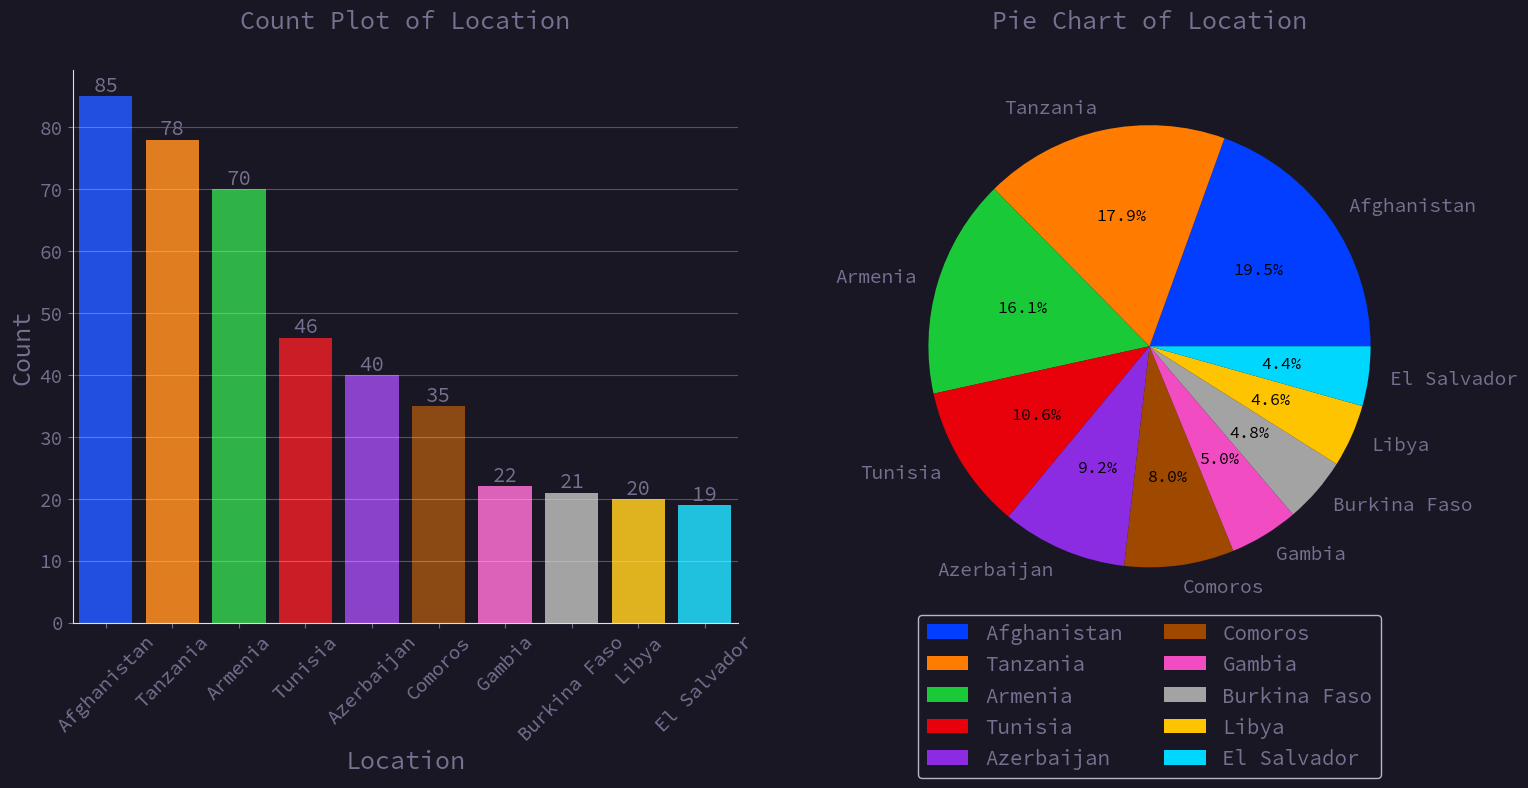

In [15]:
location_counts = df['Location'].value_counts().nlargest(10).sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(16,8))
# Bar chart
sns.barplot(x=location_counts.keys(), y=location_counts.values, palette='bright', ax=axs[0])

for index, value in enumerate(location_counts.values):
    axs[0].text(index, value, str(value), ha='center', va='bottom', fontsize=15)

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_xlabel('Location')
axs[0].set_ylabel('Count')
axs[0].set_title('Count Plot of Location', pad=30)

# Use the styled_pie_chart function for the pie chart
styled_pie_chart(axs[1], location_counts, labels=location_counts.index)

# Create a legend for the pie chart at the bottom
axs[1].legend(location_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=15, markerscale=2)

axs[1].set_title('Pie Chart of Location', pad=30)

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

In [16]:
df['Location'].nunique()

41

In [17]:
location_counts

Location
Afghanistan     85
Tanzania        78
Armenia         70
Tunisia         46
Azerbaijan      40
Comoros         35
Gambia          22
Burkina Faso    21
Libya           20
El Salvador     19
Name: count, dtype: int64

#### 2.3 Service Used

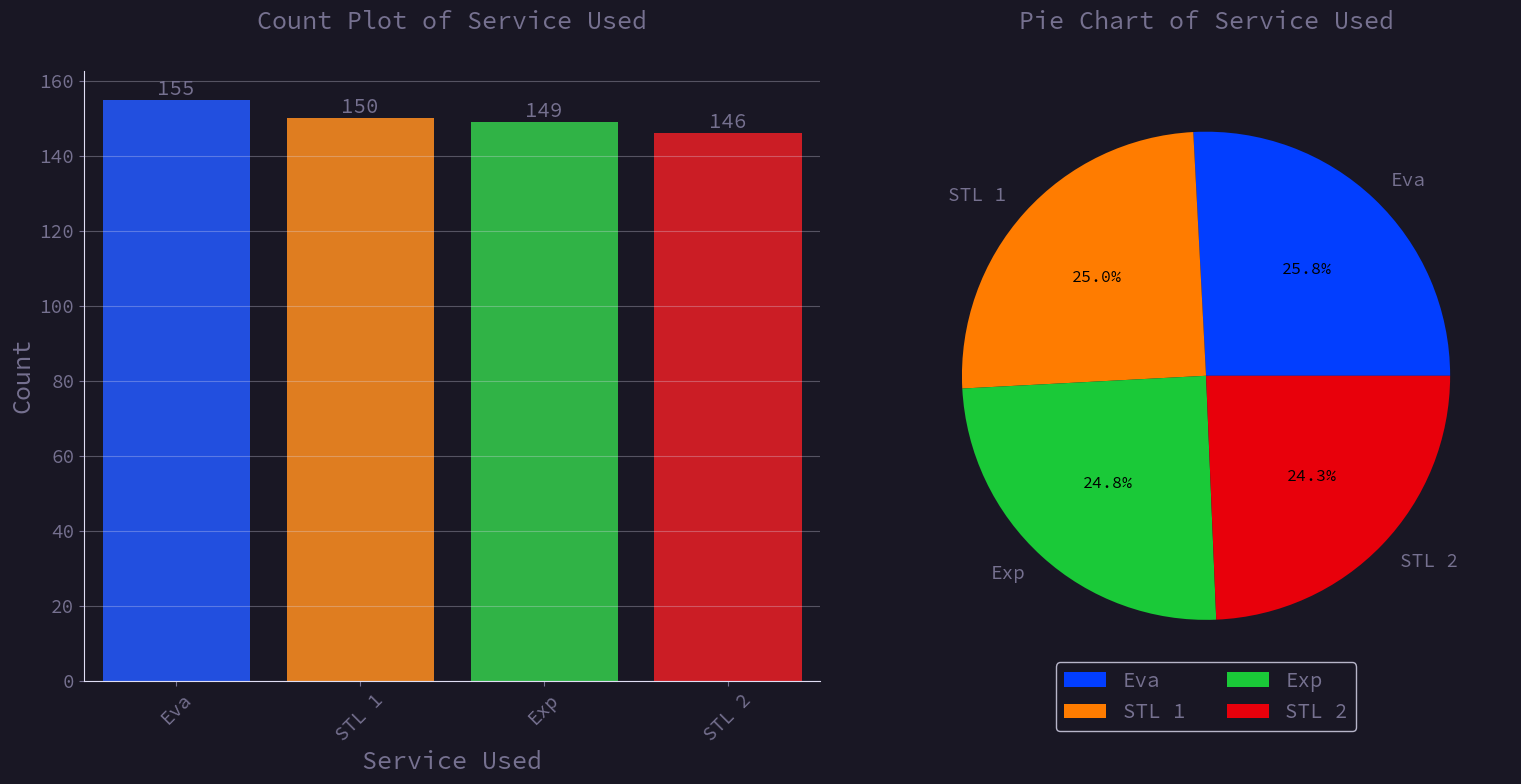

In [18]:
service_used_counts = df['Service Used'].value_counts().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(16,8))
# Bar chart
sns.barplot(x=service_used_counts.keys(), y=service_used_counts.values, palette='bright', ax=axs[0])

for index, value in enumerate(service_used_counts.values):
    axs[0].text(index, value, str(value), ha='center', va='bottom', fontsize=15)

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_xlabel('Service Used')
axs[0].set_ylabel('Count')
axs[0].set_title('Count Plot of Service Used', pad=30)

# Use the styled_pie_chart function for the pie chart
styled_pie_chart(axs[1], service_used_counts, labels=service_used_counts.index)

# Create a legend for the pie chart at the bottom
axs[1].legend(service_used_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=15, markerscale=2)

axs[1].set_title('Pie Chart of Service Used', pad=30)

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

In [19]:
service_used_counts

Service Used
Eva      155
STL 1    150
Exp      149
STL 2    146
Name: count, dtype: int64

#### 2.4 Payment Method

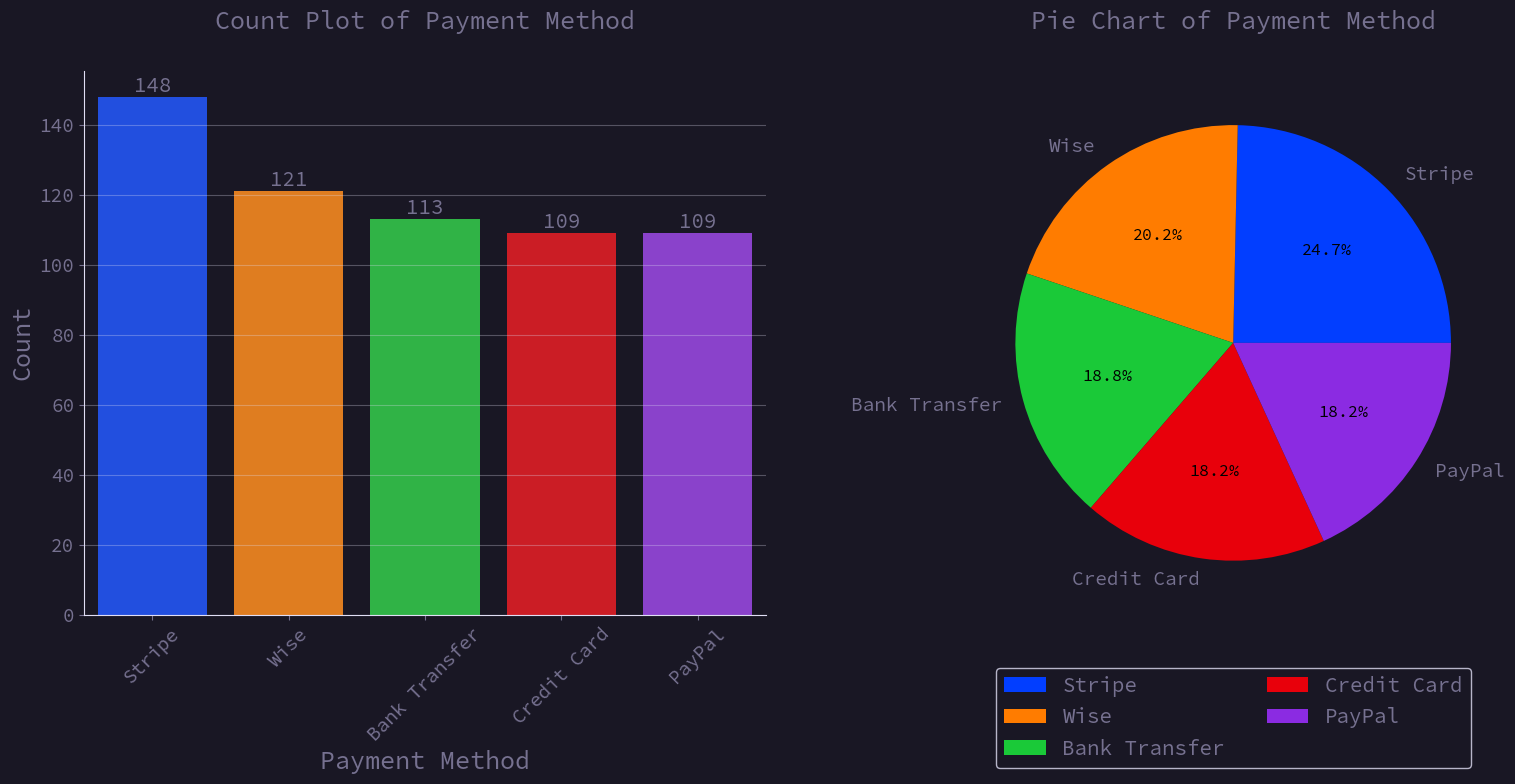

In [20]:
payment_method_counts = df['Payment Method'].value_counts().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(16,8))
# Bar chart
sns.barplot(x=payment_method_counts.keys(), y=payment_method_counts.values, palette='bright', ax=axs[0])

for index, value in enumerate(payment_method_counts.values):
    axs[0].text(index, value, str(value), ha='center', va='bottom', fontsize=15)

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_xlabel('Payment Method')
axs[0].set_ylabel('Count')
axs[0].set_title('Count Plot of Payment Method', pad=30)

# Use the styled_pie_chart function for the pie chart
styled_pie_chart(axs[1], payment_method_counts, labels=payment_method_counts.index)

# Create a legend for the pie chart at the bottom
axs[1].legend(payment_method_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=15, markerscale=2)

axs[1].set_title('Pie Chart of Payment Method', pad=30)

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

#### 3.5 Membership Status

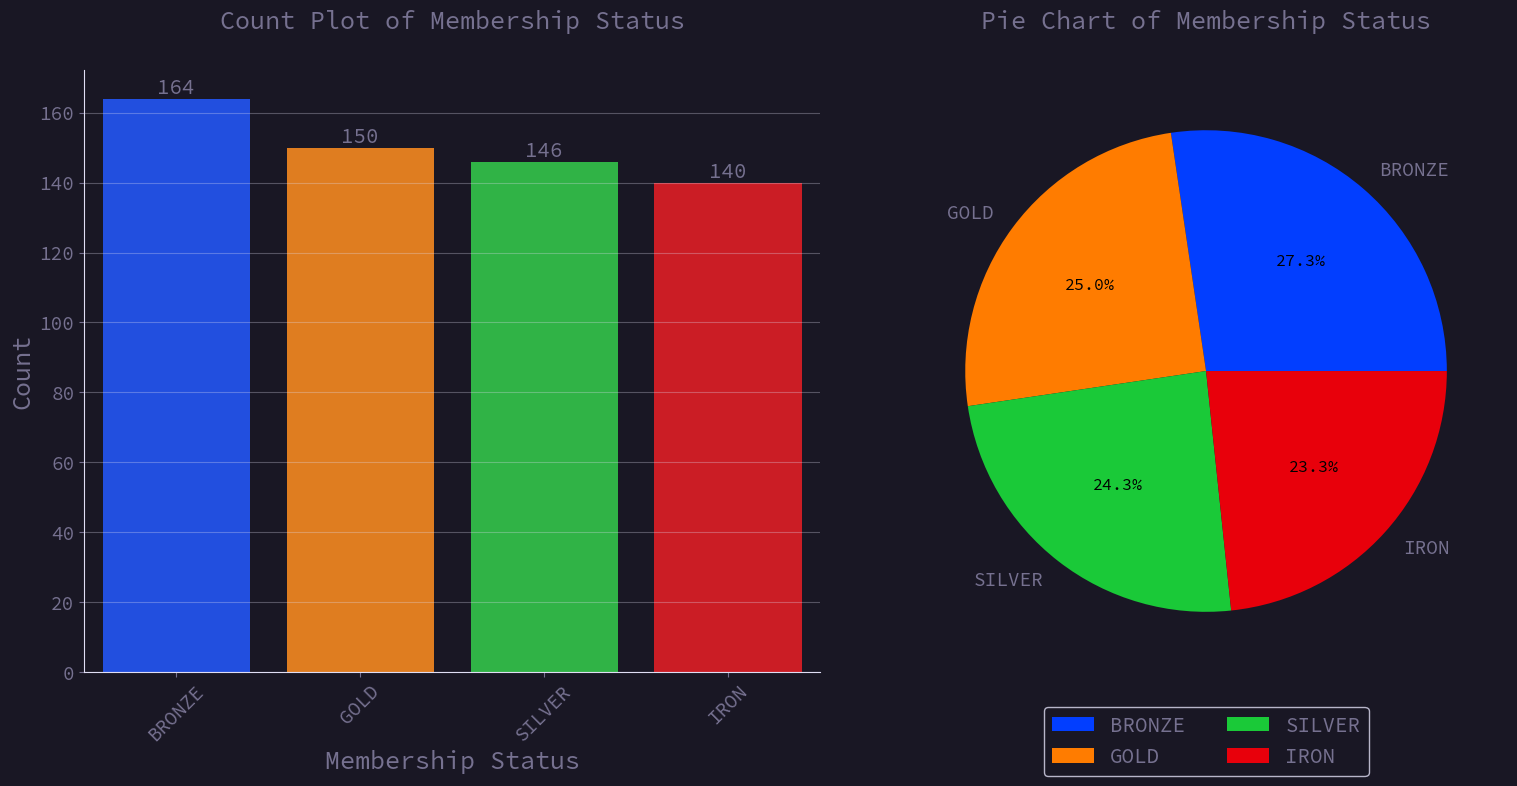

In [21]:
membership_status_counts = df['Membership Status'].value_counts().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(16,8))
# Bar chart
sns.barplot(x=membership_status_counts.keys(), y=membership_status_counts.values, palette='bright', ax=axs[0])

for index, value in enumerate(membership_status_counts.values):
    axs[0].text(index, value, str(value), ha='center', va='bottom', fontsize=15)

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_xlabel('Membership Status')
axs[0].set_ylabel('Count')
axs[0].set_title('Count Plot of Membership Status', pad=30)

# Use the styled_pie_chart function for the pie chart
styled_pie_chart(axs[1], membership_status_counts, labels=membership_status_counts.index)

# Create a legend for the pie chart at the bottom
axs[1].legend(membership_status_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.19), ncol=2, fontsize=15, markerscale=2)

axs[1].set_title('Pie Chart of Membership Status', pad=30)

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

### 3. Bivariate Analysis

In [22]:
df.columns

Index(['First Name', 'Last Name', 'Email', 'Gender', 'Age', 'IP Address',
       'Location', 'Date of Transaction', 'Service Used', 'Transaction Amount',
       'Payment Method', 'Membership Status'],
      dtype='object')

#### 3.1 Gender Wise Average 'Transaction Amount'

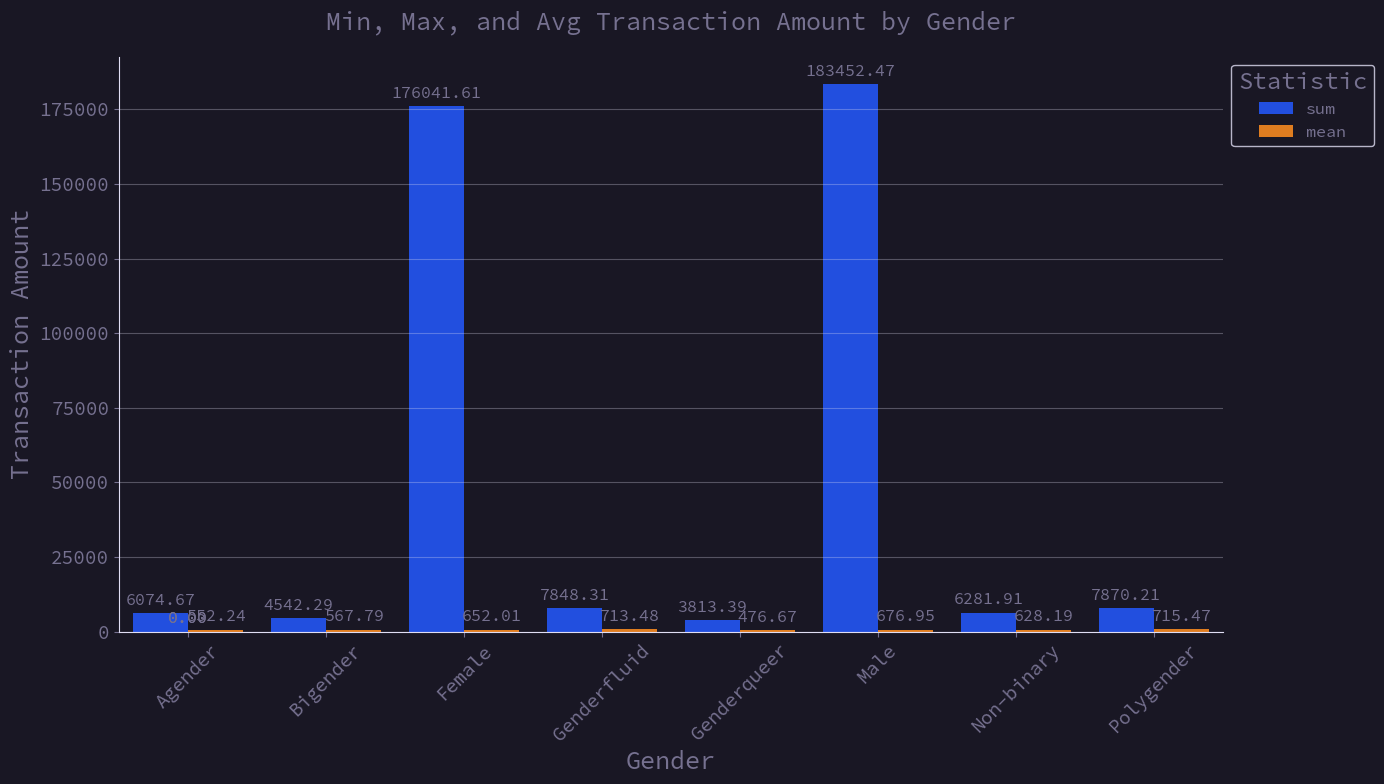

In [23]:
# Group by 'Gender' and aggregate 'Transaction Amount' by sum and mean
grouped_gender = df.groupby('Gender')['Transaction Amount'].agg(['sum', 'mean']).reset_index()

# Melt the data to have 'sum' and 'mean' as values under a single column 'Statistic'
melted_data = pd.melt(grouped_gender, id_vars='Gender', value_vars=['sum', 'mean'], var_name='Statistic', value_name='Transaction Amount')

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='Gender', y='Transaction Amount', hue='Statistic', data=melted_data, palette='bright')

# Rotate the x-tick labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

# Add numbers on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')

# Add Labels and title
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.title('Min, Max, and Avg Transaction Amount by Gender', pad=20)

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic', title_fontsize='x-large', fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

### 3.2 Age wise Transaction Amount (Minimum, Maximum, and Average)

In [24]:
df['Age'].max()

np.int64(32)

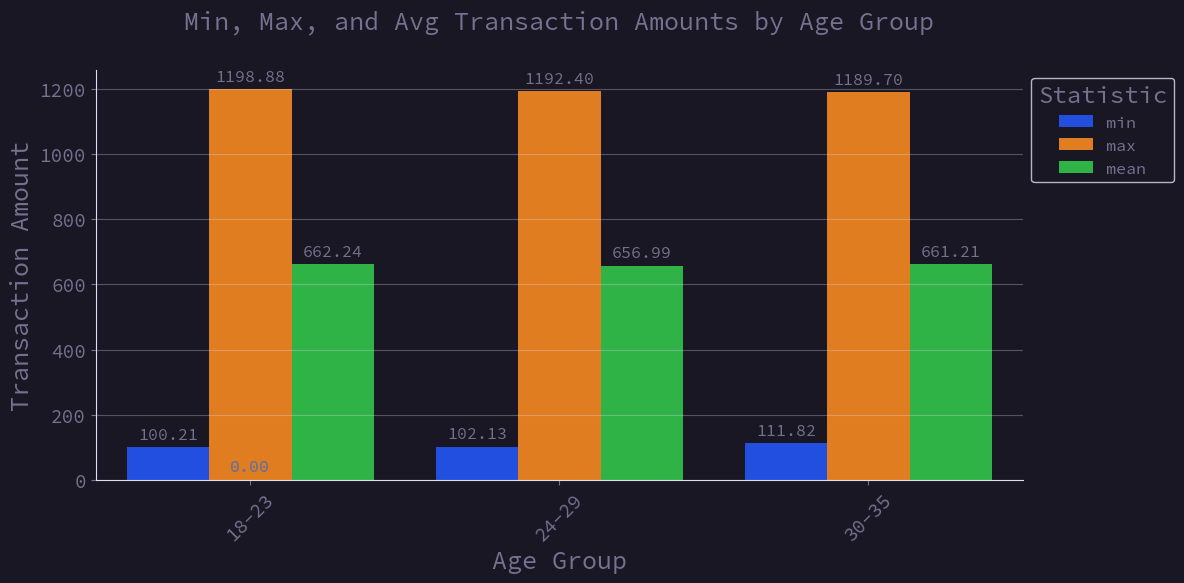

In [25]:
bins = [18, 23, 29, 35]
labels = ['18-23', '24-29', '30-35']

# Create age groups based on 'Age'
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate min, max, and avg transaction amounts
grouped_data = df.groupby('age_group')['Transaction Amount'].agg(['min', 'max', 'mean']).reset_index()

# Melt the data for easier plotting with seaborn
melted_data = pd.melt(grouped_data, id_vars='age_group', value_vars=['min', 'max', 'mean'],
                      var_name='Statistic', value_name='Transaction Amount')

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='age_group', y='Transaction Amount', hue='Statistic', data=melted_data, palette='bright')

# Rotate the x-tick labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

# Add numbers on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount')
plt.title('Min, Max, and Avg Transaction Amounts by Age Group', pad=30)
plt.ylim(bottom=0)

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic', title_fontsize='x-large', fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
df.columns

Index(['First Name', 'Last Name', 'Email', 'Gender', 'Age', 'IP Address',
       'Location', 'Date of Transaction', 'Service Used', 'Transaction Amount',
       'Payment Method', 'Membership Status', 'age_group'],
      dtype='object')

### 3.3 Service Used wise Transaction Amount (Minimum, Maximum, and Average)

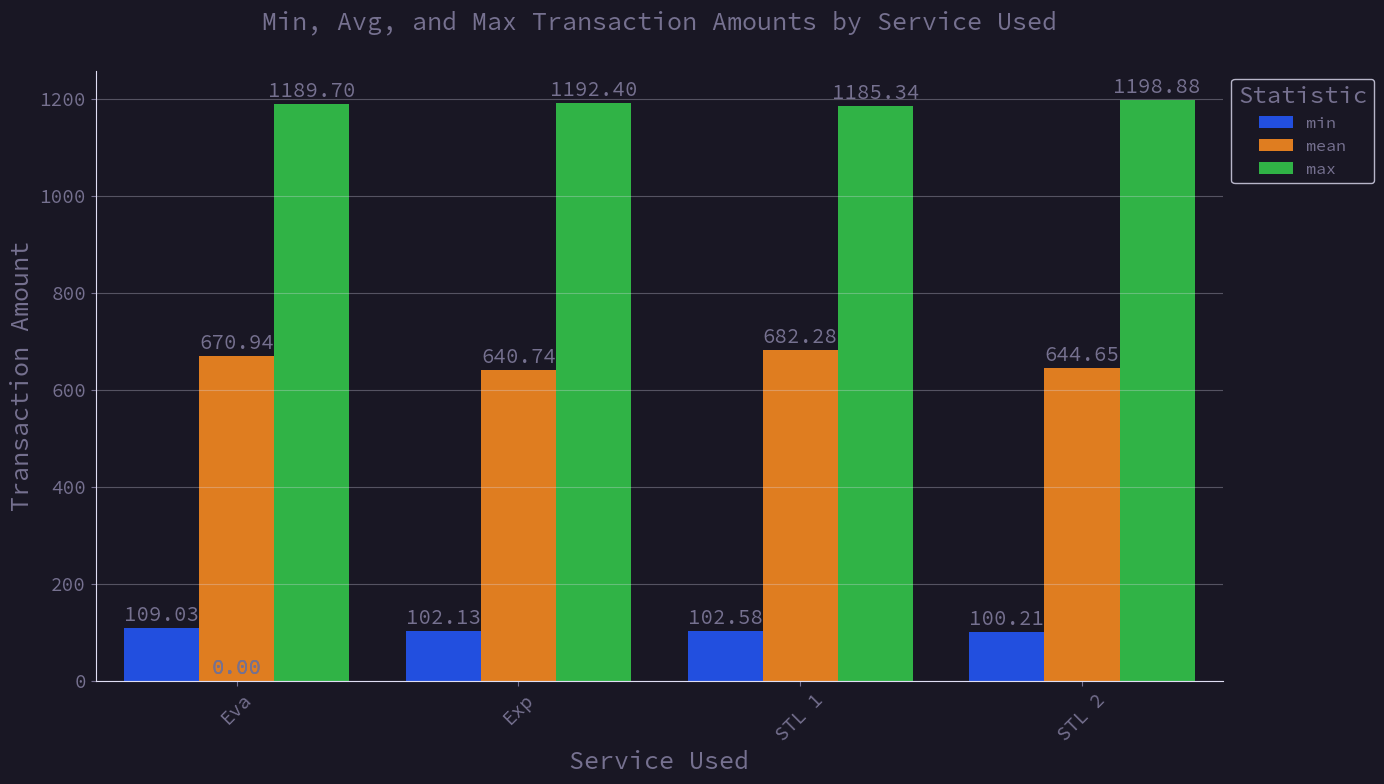

In [27]:
# Group by 'Service Used' and calculate min, mean, and max transaction amounts
service_used_grouped = df.groupby('Service Used')['Transaction Amount'].agg(['min', 'mean', 'max']).reset_index()

# Melt the data for easier plotting with seaborn
melted_data = pd.melt(service_used_grouped, id_vars='Service Used', value_vars=['min', 'mean', 'max'],
                      var_name='Statistic', value_name='Transaction Amount')

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='Service Used', y='Transaction Amount', hue='Statistic', data=melted_data, palette='bright')

# Rotate the x-tick labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

# Add numbers on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points', fontsize=15)

# Add labels and title
plt.xlabel('Service Used')
plt.ylabel('Transaction Amount')
plt.title('Min, Avg, and Max Transaction Amounts by Service Used', pad=30)

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic', title_fontsize='x-large', fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

### 3.4 Payment Method wise Transaction Amount (Min, Max, and Avg)

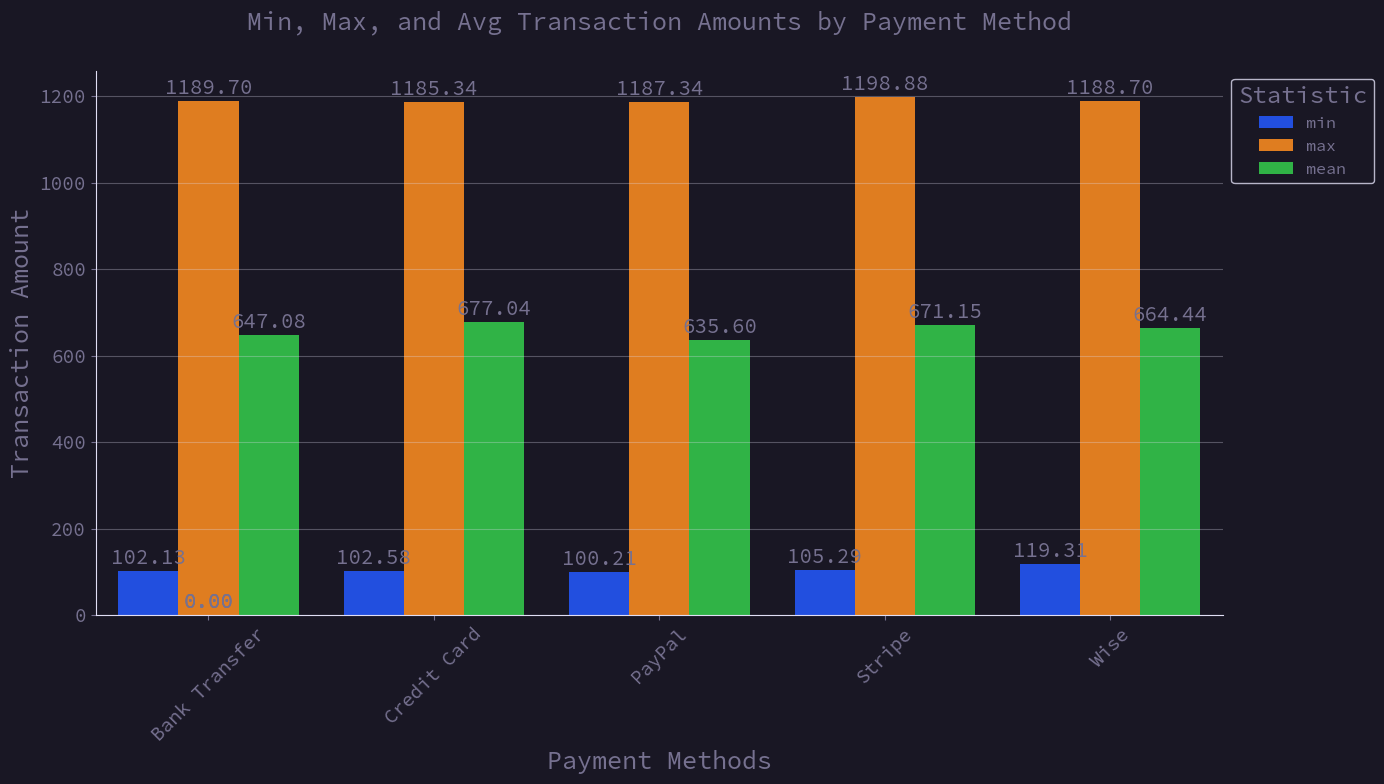

In [28]:
payment_method_grouped = df.groupby('Payment Method')['Transaction Amount'].agg(['min', 'max', 'mean']).reset_index()
melted_data = pd.melt(payment_method_grouped, id_vars='Payment Method', value_vars=['min', 'max', 'mean'], var_name='Statistic', value_name='Transaction Amount')

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='Payment Method', y='Transaction Amount', hue='Statistic', data=melted_data, palette='bright')

# Rotate the x-tick labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

# Add numbers on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points', fontsize=15)

# Add labels and title
plt.xlabel('Payment Methods')
plt.ylabel('Transaction Amount')
plt.title('Min, Max, and Avg Transaction Amounts by Payment Method', pad=30)

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic', title_fontsize='x-large', fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

### 3.5 Membership Status wise Transaction Amount (Min, Max, and Avg)

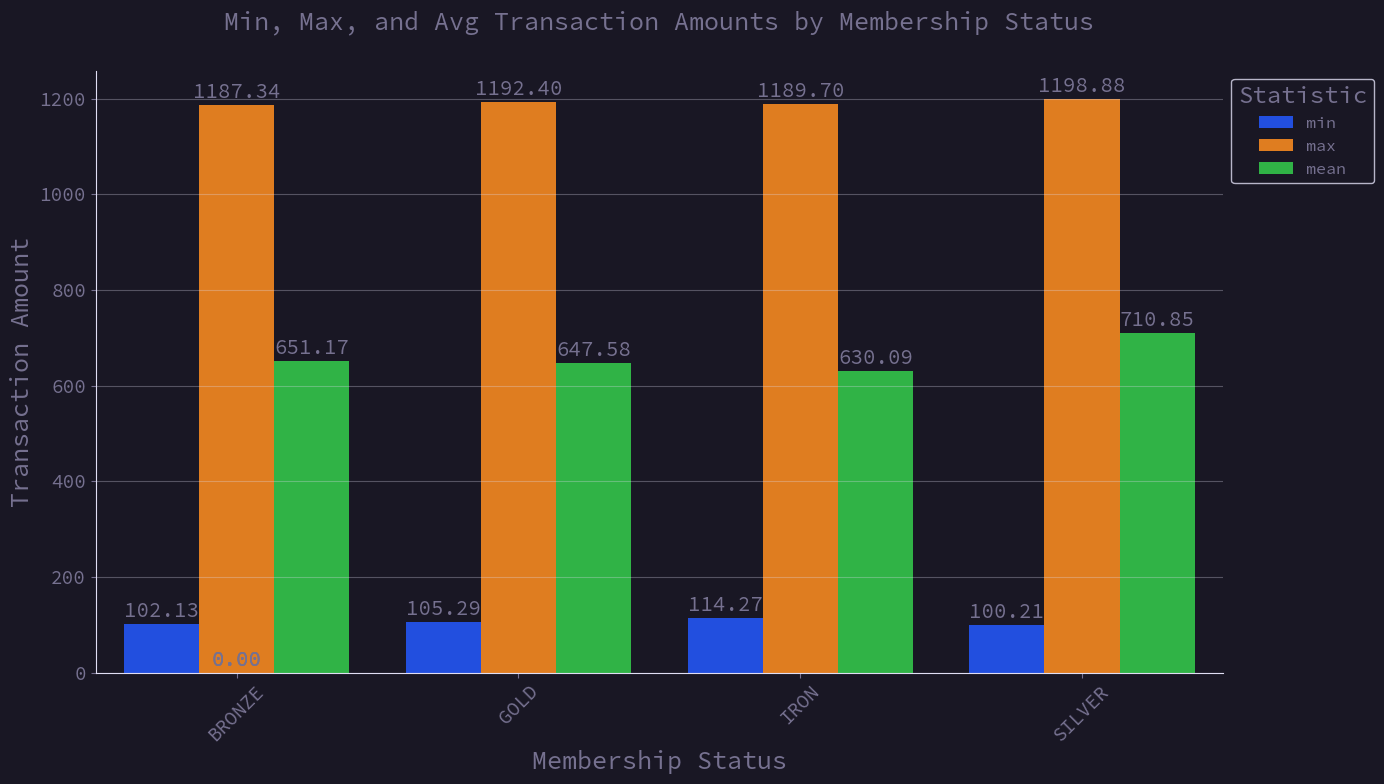

In [29]:
membership_status_grouped = df.groupby('Membership Status')['Transaction Amount'].agg(['min', 'max', 'mean']).reset_index()
melted_data = pd.melt(membership_status_grouped, id_vars='Membership Status', value_vars=['min', 'max', 'mean'], var_name='Statistic', value_name='Transaction Amount')

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='Membership Status', y='Transaction Amount', hue='Statistic', data=melted_data, palette='bright')

# Rotate the x-tick labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

# Add numbers on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points', fontsize=15)

# Add labels and title
plt.xlabel('Membership Status')
plt.ylabel('Transaction Amount')
plt.title('Min, Max, and Avg Transaction Amounts by Membership Status', pad=30)

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic', title_fontsize='x-large', fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

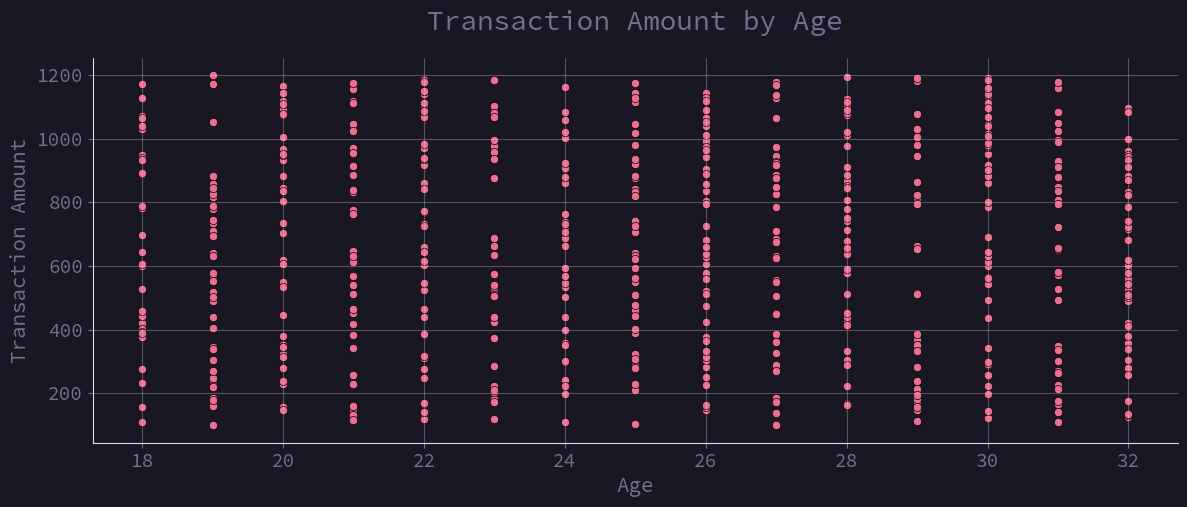

In [30]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df,
                x='Age',
                y='Transaction Amount',
                edgecolor='black', color='#eb6f92')

# Add labels and title
plt.title('Transaction Amount by Age', size=20, pad=20)
plt.xlabel('Age', size=15)
plt.ylabel('Transaction Amount', size=15)
plt.show()

In [31]:
df.head()

,First Name,Last Name,Email,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status,age_group
0,Cristi,Jerrome,cjerrome0@deviantart.com,Agender,32,115.186.14.16,Afghanistan,2022-09-08,Eva,124.48,Stripe,BRONZE,30-35
1,Bowie,Agge,bagge1@hubpages.com,Male,24,58.229.97.212,Sierra Leone,2022-12-29,STL 1,694.88,Stripe,BRONZE,24-29
2,Griz,Slayford,gslayford2@weebly.com,Male,24,33.120.228.123,Armenia,2022-10-24,Eva,441.05,Credit Card,GOLD,24-29
3,Erika,Matelaitis,ematelaitis3@com.com,Female,21,43.21.47.25,Armenia,2023-08-24,Eva,453.79,Stripe,IRON,18-23
4,Nester,Paulon,npaulon4@wix.com,Male,27,99.160.35.96,Armenia,2023-01-05,STL 1,287.75,Stripe,BRONZE,24-29


In [32]:
df['Email'].nunique()

600

In [33]:
df.head()

,First Name,Last Name,Email,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status,age_group
0,Cristi,Jerrome,cjerrome0@deviantart.com,Agender,32,115.186.14.16,Afghanistan,2022-09-08,Eva,124.48,Stripe,BRONZE,30-35
1,Bowie,Agge,bagge1@hubpages.com,Male,24,58.229.97.212,Sierra Leone,2022-12-29,STL 1,694.88,Stripe,BRONZE,24-29
2,Griz,Slayford,gslayford2@weebly.com,Male,24,33.120.228.123,Armenia,2022-10-24,Eva,441.05,Credit Card,GOLD,24-29
3,Erika,Matelaitis,ematelaitis3@com.com,Female,21,43.21.47.25,Armenia,2023-08-24,Eva,453.79,Stripe,IRON,18-23
4,Nester,Paulon,npaulon4@wix.com,Male,27,99.160.35.96,Armenia,2023-01-05,STL 1,287.75,Stripe,BRONZE,24-29


In [34]:
pd.crosstab(df['Gender'], df['Service Used'], normalize='columns')*100

Service Used,Eva,Exp,STL 1,STL 2
Gender,,,,
Agender,3.870968,0.671141,2.000000,0.684932
Bigender,0.000000,2.684564,0.000000,2.739726
Female,51.612903,40.939597,40.000000,47.260274
Genderfluid,0.645161,2.013423,3.333333,1.369863
Genderqueer,1.290323,1.342282,2.666667,0.000000
Male,39.354839,49.664430,48.000000,43.835616
Non-binary,1.935484,0.671141,2.000000,2.054795
Polygender,1.290323,2.013423,2.000000,2.054795


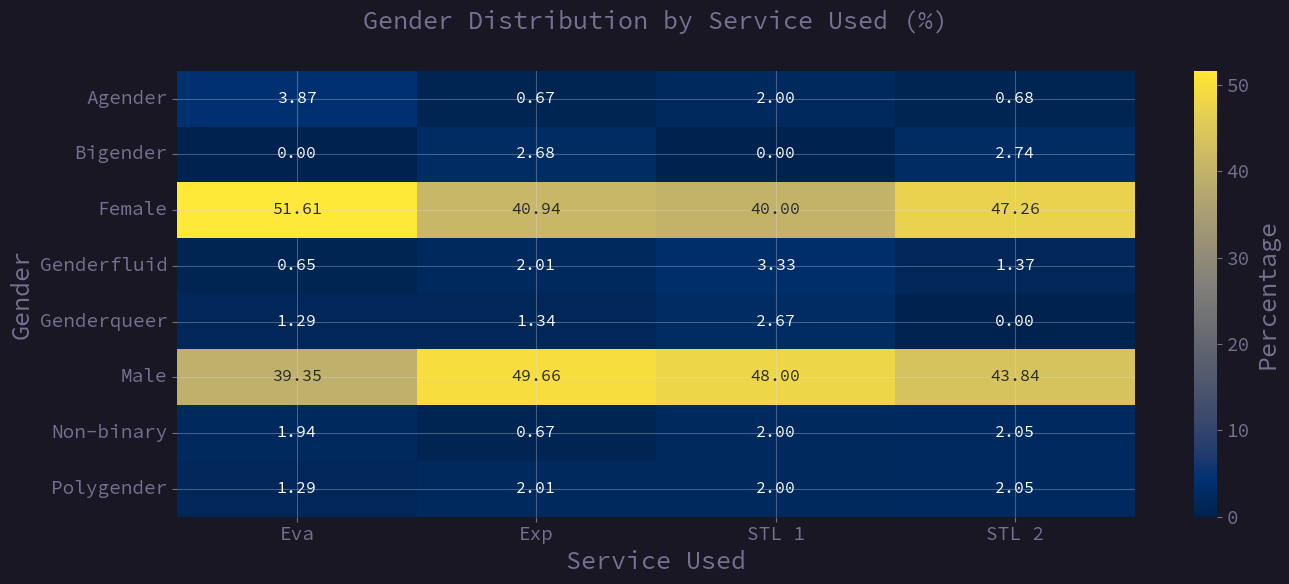

In [35]:
crosstab = pd.crosstab(df['Gender'], df['Service Used'], normalize='columns') * 100

# Visualize the crosstab data using a heatmap
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="cividis", cbar_kws={'label': 'Percentage'})

# Add labels and title
plt.xlabel('Service Used')
plt.ylabel('Gender')
plt.title('Gender Distribution by Service Used (%)', pad=30)
# Save the plot with a border
save_plot_with_border(fig, 'gender_distribution_service.png')
plt.show()

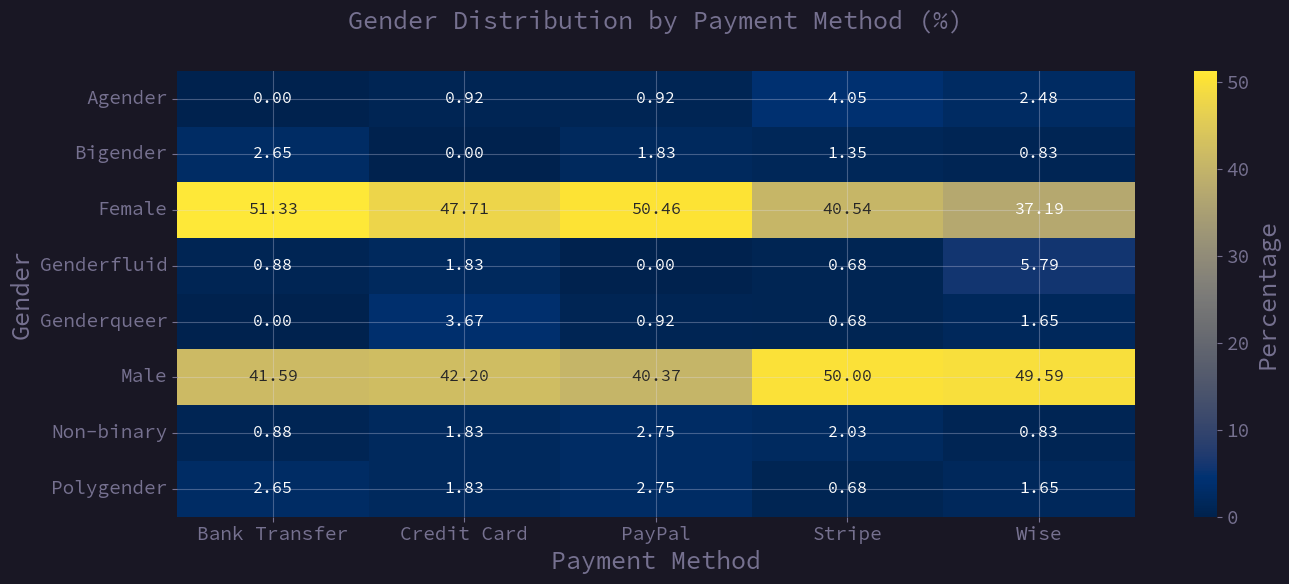

In [36]:
crosstab = pd.crosstab(df['Gender'], df['Payment Method'], normalize='columns') * 100

# Visualize the crosstab data using a heatmap
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="cividis", cbar_kws={'label': 'Percentage'})

# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Gender')
plt.title('Gender Distribution by Payment Method (%)', pad=30)
# Save the plot with a border
save_plot_with_border(fig, 'gender_distribution_payment.png')
plt.show()

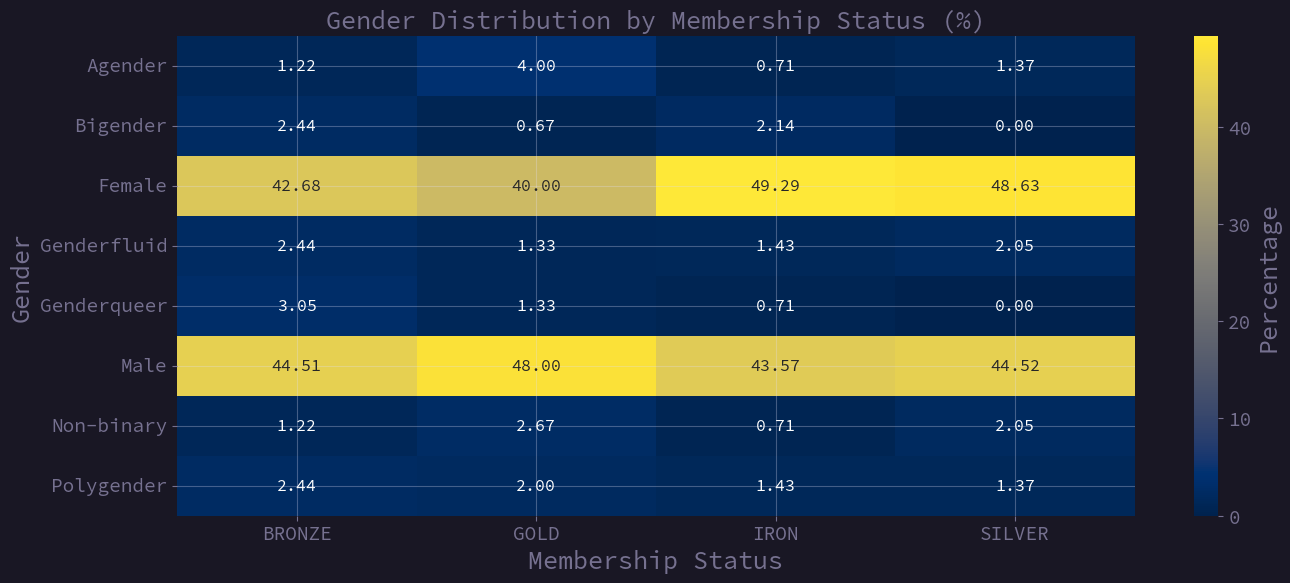

In [37]:
crosstab = pd.crosstab(df['Gender'], df['Membership Status'], normalize='columns') * 100

# Visualize the crosstab data using a heatmap
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="cividis", cbar_kws={'label': 'Percentage'})

# Add labels and title
plt.xlabel('Membership Status')
plt.ylabel('Gender')
plt.title('Gender Distribution by Membership Status (%)')
# Save the plot with a border
save_plot_with_border(fig, 'gender_distribution_membership.png')
plt.show()

In [38]:
grouped_gender = df.groupby('Gender')['Transaction Amount'].agg(['mean', 'sum'])
grouped_gender

,mean,sum
Gender,,
Agender,552.242727,6074.67
Bigender,567.786250,4542.29
Female,652.005963,176041.61
Genderfluid,713.482727,7848.31
Genderqueer,476.673750,3813.39
Male,676.946384,183452.47
Non-binary,628.191000,6281.91
Polygender,715.473636,7870.21


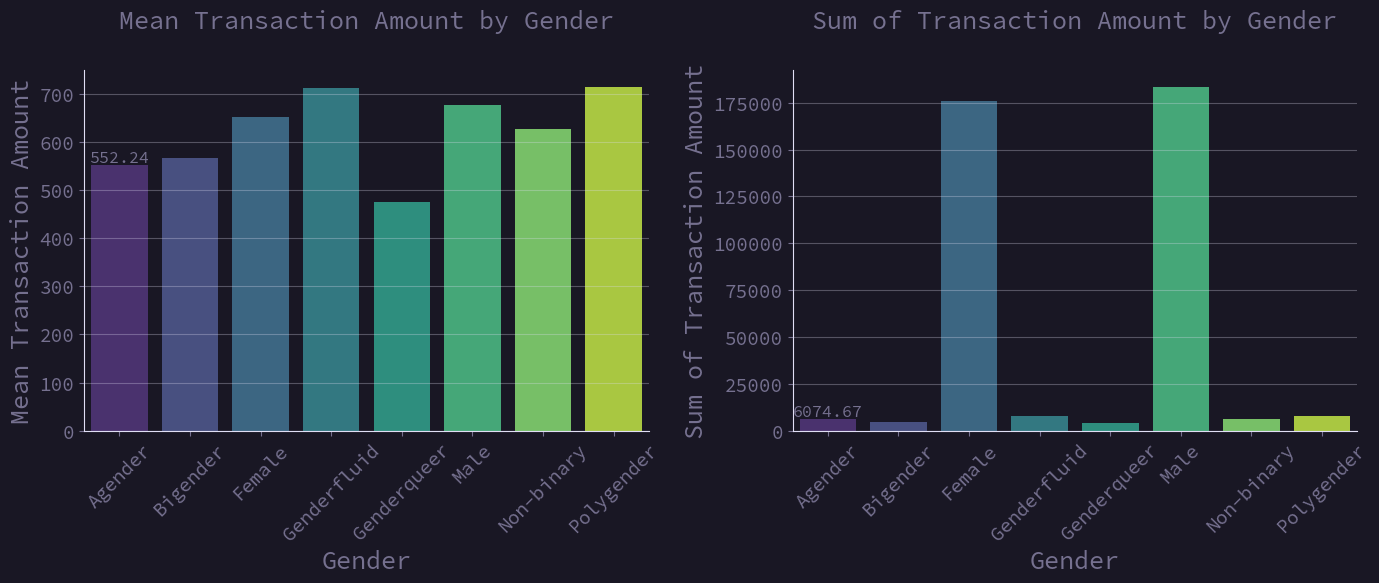

In [39]:
# Group by 'Gender' and calculate sum and mean transaction amounts
grouped_gender = df.groupby('Gender')['Transaction Amount'].agg(['sum', 'mean']).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot mean transaction amount by gender
sns.barplot(x='Gender', y='mean', data=grouped_gender, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Transaction Amount by Gender', pad=30)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Mean Transaction Amount')
axes[0].bar_label(axes[0].containers[0], fmt='%.2f')

# Plot sum transaction amount by gender
sns.barplot(x='Gender', y='sum', data=grouped_gender, ax=axes[1], palette='viridis')
axes[1].set_title('Sum of Transaction Amount by Gender', pad=30)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Sum of Transaction Amount')
axes[1].bar_label(axes[1].containers[0], fmt='%.2f')

# Rotate x-ticks for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust Layout
plt.tight_layout()

# Show Plot
plt.show()

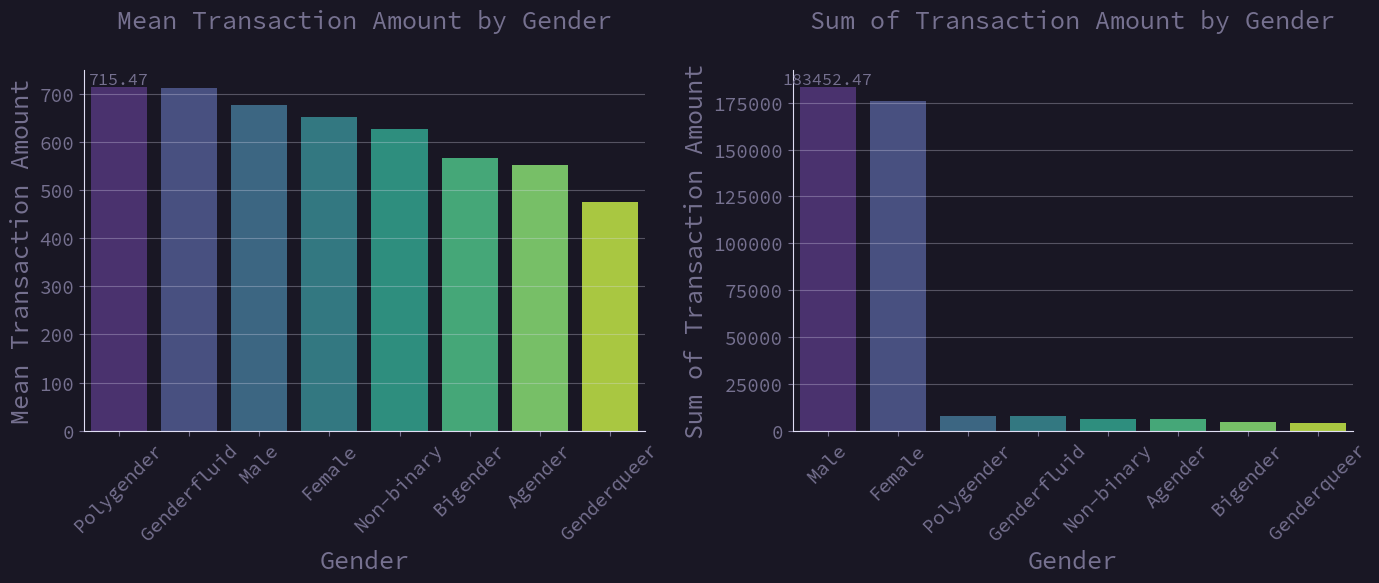

In [40]:
# Group by 'Gender' and calculate sum and mean transaction amounts
grouped_gender = df.groupby('Gender')['Transaction Amount'].agg(['sum', 'mean']).reset_index()

# Sort the grouped data by mean and sum in descending order
grouped_gender_mean_sorted = grouped_gender.sort_values(by='mean', ascending=False)
grouped_gender_sum_sorted = grouped_gender.sort_values(by='sum', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot mean transaction amount by gender
sns.barplot(x='Gender', y='mean', data=grouped_gender_mean_sorted, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Transaction Amount by Gender', pad=30)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Mean Transaction Amount')
axes[0].bar_label(axes[0].containers[0], fmt='%.2f')

# Plot sum transaction amount by gender
sns.barplot(x='Gender', y='sum', data=grouped_gender_sum_sorted, ax=axes[1], palette='viridis')
axes[1].set_title('Sum of Transaction Amount by Gender', pad=30)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Sum of Transaction Amount')
axes[1].bar_label(axes[1].containers[0], fmt='%.2f')

# Rotate x-ticks for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust Layout
plt.tight_layout()


# Show Plot
plt.show()

In [41]:
grouped_gender_mean_sorted

,Gender,sum,mean
7,Polygender,7870.21,715.473636
3,Genderfluid,7848.31,713.482727
5,Male,183452.47,676.946384
2,Female,176041.61,652.005963
6,Non-binary,6281.91,628.191000
1,Bigender,4542.29,567.786250
0,Agender,6074.67,552.242727
4,Genderqueer,3813.39,476.673750


In [42]:
grouped_gender_sum_sorted

,Gender,sum,mean
5,Male,183452.47,676.946384
2,Female,176041.61,652.005963
7,Polygender,7870.21,715.473636
3,Genderfluid,7848.31,713.482727
6,Non-binary,6281.91,628.191000
0,Agender,6074.67,552.242727
1,Bigender,4542.29,567.786250
4,Genderqueer,3813.39,476.673750


In [43]:
grouped_gender = df.groupby(['Gender', 'Membership Status'])['Transaction Amount'].agg(['mean', 'sum']).reset_index()
grouped_gender.sort_values(by='sum', ascending=False)

,Gender,Membership Status,mean,sum
19,Male,GOLD,691.345417,49776.87
21,Male,SILVER,744.047385,48363.08
18,Male,BRONZE,658.689452,48084.33
7,Female,BRONZE,684.450286,47911.52
10,Female,SILVER,659.463099,46821.88
9,Female,IRON,644.902174,44498.25
20,Male,IRON,610.298197,37228.19
8,Female,GOLD,613.499333,36809.96
14,Genderfluid,SILVER,1080.953333,3242.86
23,Non-binary,GOLD,776.637500,3106.55


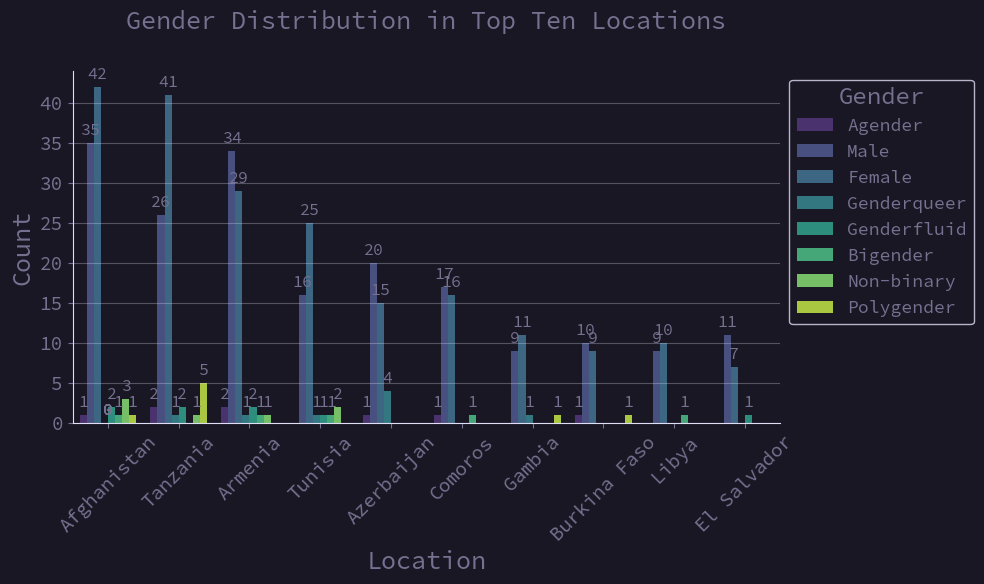

In [44]:
top_locations = df['Location'].value_counts().nlargest(10).index

# Filter the data to include only the top ten locations
filtered_df = df[df['Location'].isin(top_locations)]

# Visualize the gender distribution within the top ten locations
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Location', hue='Gender', order=top_locations, palette='viridis')
plt.title('Gender Distribution in Top Ten Locations', pad=30)
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add numbers at the top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Gender', title_fontsize='x-large', fontsize=13)

# Save the plot with a border
save_plot_with_border(fig, 'gender_top_location.png')

plt.tight_layout()
plt.show()

In [45]:
grouped_gender = df.groupby('Gender')['Age'].agg(['min', 'mean', 'sum']).reset_index()
grouped_gender

,Gender,min,mean,sum
0,Agender,18,23.818182,262
1,Bigender,22,26.125000,209
2,Female,18,25.396296,6857
3,Genderfluid,18,27.000000,297
4,Genderqueer,18,25.250000,202
5,Male,18,25.228782,6837
6,Non-binary,18,24.200000,242
7,Polygender,18,23.090909,254


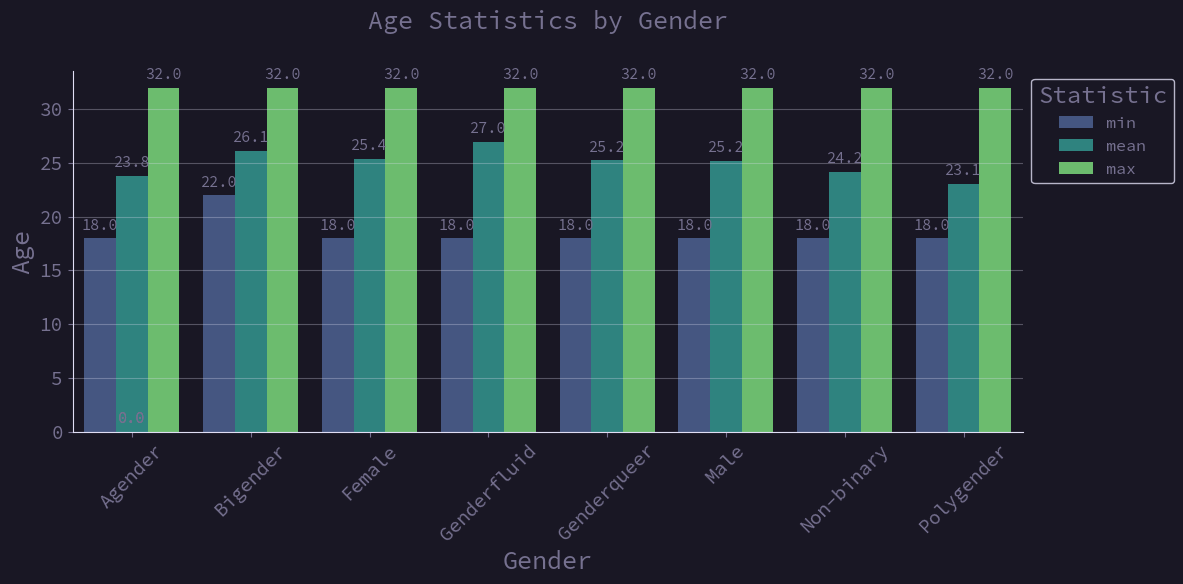

In [46]:
grouped_gender = df.groupby('Gender')['Age'].agg(['min', 'mean', 'max']).reset_index()

# Melt the DataFrame for easier plotting
grouped_gender_melted = grouped_gender.melt(id_vars='Gender', var_name='Statistic', value_name='Age')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_gender_melted, x='Gender', y='Age', hue='Statistic', palette='viridis')

# Add numbers at the top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points', fontsize=11)

# Add Labels and title
plt.title('Age Statistics by Gender', pad=30)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.xticks(rotation=45)

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Statistic', title_fontsize='x-large', fontsize='medium')

# Save the plot with a border
save_plot_with_border(fig, 'age_statistics_gender.png')

# Show plot
plt.tight_layout()
plt.show()

In [47]:
df.head()

,First Name,Last Name,Email,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status,age_group
0,Cristi,Jerrome,cjerrome0@deviantart.com,Agender,32,115.186.14.16,Afghanistan,2022-09-08,Eva,124.48,Stripe,BRONZE,30-35
1,Bowie,Agge,bagge1@hubpages.com,Male,24,58.229.97.212,Sierra Leone,2022-12-29,STL 1,694.88,Stripe,BRONZE,24-29
2,Griz,Slayford,gslayford2@weebly.com,Male,24,33.120.228.123,Armenia,2022-10-24,Eva,441.05,Credit Card,GOLD,24-29
3,Erika,Matelaitis,ematelaitis3@com.com,Female,21,43.21.47.25,Armenia,2023-08-24,Eva,453.79,Stripe,IRON,18-23
4,Nester,Paulon,npaulon4@wix.com,Male,27,99.160.35.96,Armenia,2023-01-05,STL 1,287.75,Stripe,BRONZE,24-29


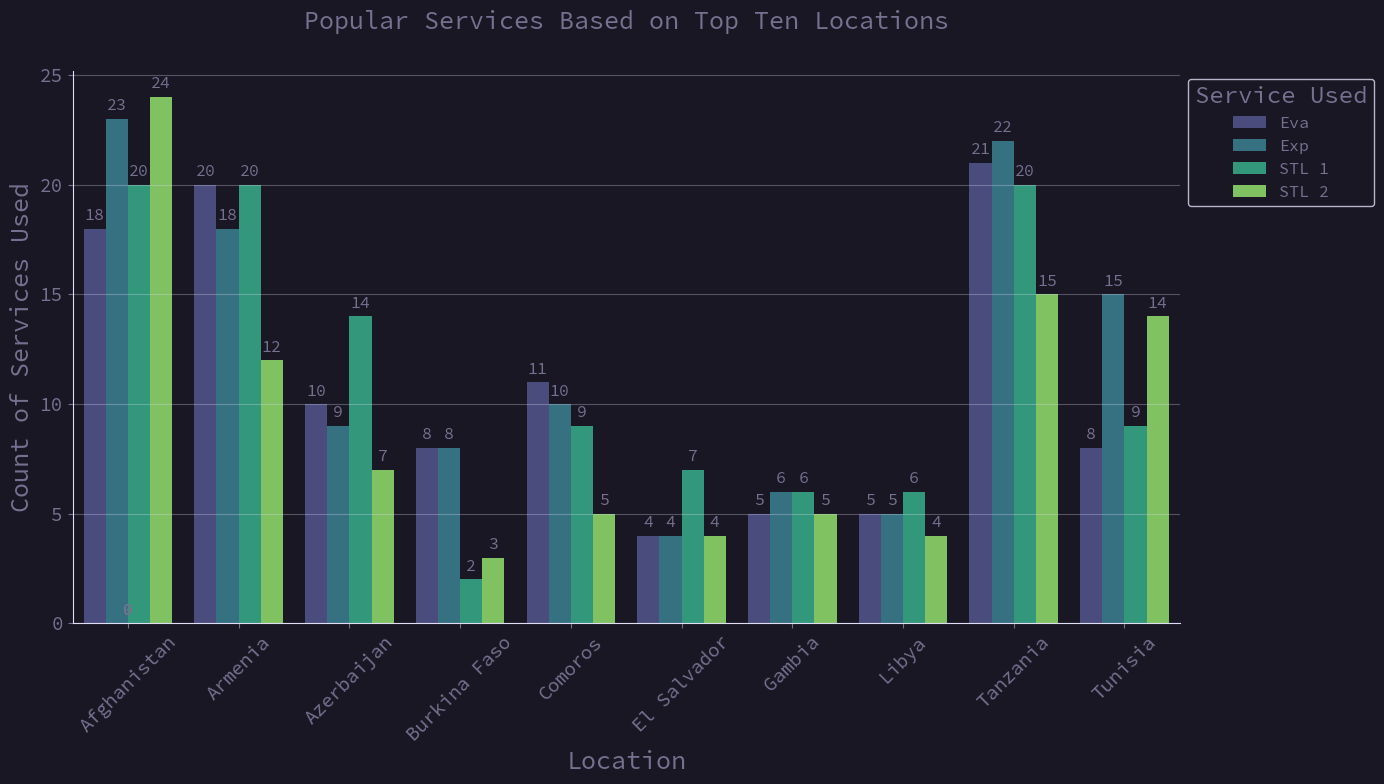

In [48]:
# Identify the top ten Locations
top_locations = df['Location'].value_counts().nlargest(10).index

# Filter the data to include only the top ten Locations
filtered_df = df[df['Location'].isin(top_locations)]

# Count occurrences of each service in each Location
service_location_counts = filtered_df.groupby(['Location', 'Service Used']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=service_location_counts, x='Location', y='Count', hue='Service Used', palette='viridis')

# Add numbers at the top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

# Add labels and title
plt.title('Popular Services Based on Top Ten Locations', pad=30)
plt.xlabel('Location')
plt.ylabel('Count of Services Used')
plt.xticks(rotation=45)

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Service Used', title_fontsize='x-large', fontsize='medium')

# Show plot
plt.tight_layout()

plt.show()

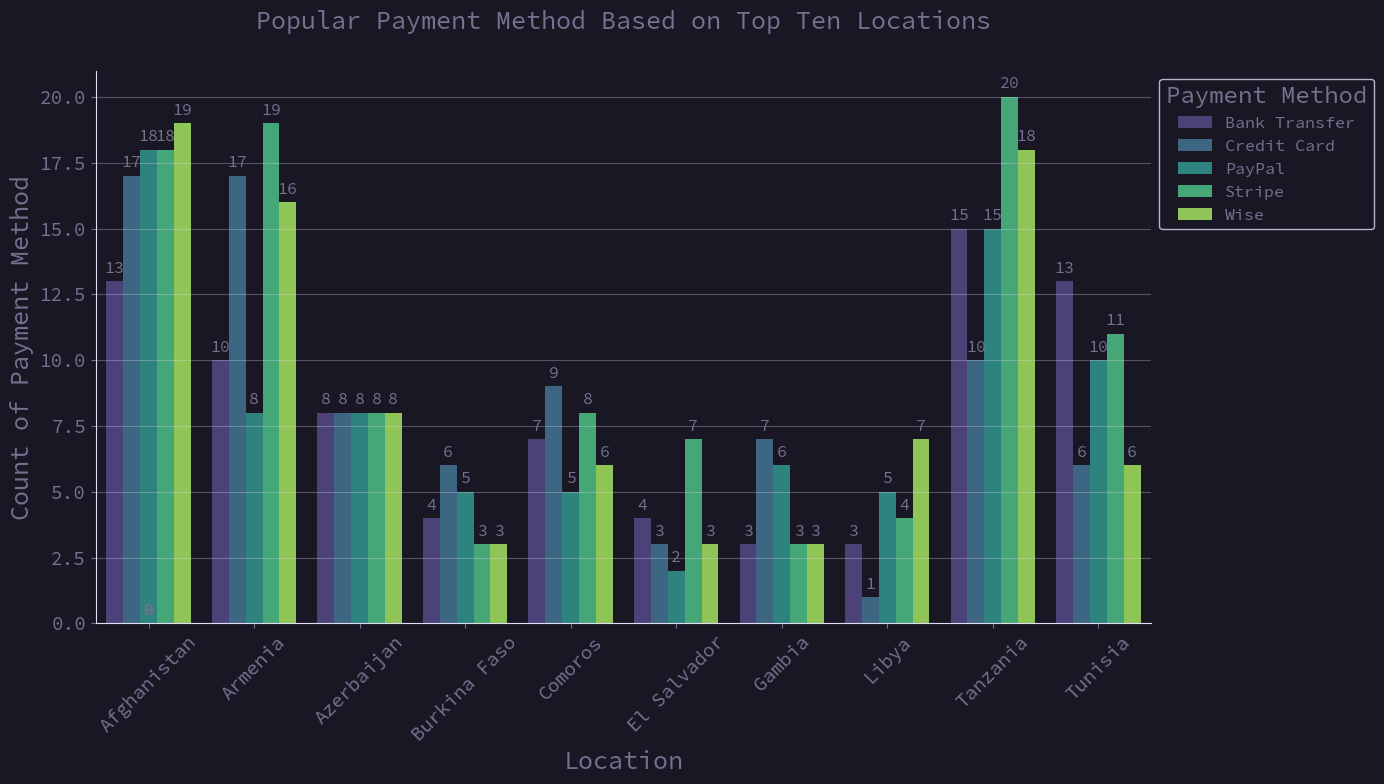

In [49]:
# Identify the top ten Locations
top_locations = df['Location'].value_counts().nlargest(10).index

# Filter the data to include only the top ten Locations
filtered_df = df[df['Location'].isin(top_locations)]

# Count occurrences of each service in each Location
service_location_counts = filtered_df.groupby(['Location', 'Payment Method']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=service_location_counts, x='Location', y='Count', hue='Payment Method', palette='viridis')

# Add numbers at the top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

# Add labels and title
plt.title('Popular Payment Method Based on Top Ten Locations', pad=30)
plt.xlabel('Location')
plt.ylabel('Count of Payment Method')
plt.xticks(rotation=45)

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Payment Method', title_fontsize='x-large', fontsize='medium')

# Show plot
plt.tight_layout()
plt.show()

In [50]:
df.head()

,First Name,Last Name,Email,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status,age_group
0,Cristi,Jerrome,cjerrome0@deviantart.com,Agender,32,115.186.14.16,Afghanistan,2022-09-08,Eva,124.48,Stripe,BRONZE,30-35
1,Bowie,Agge,bagge1@hubpages.com,Male,24,58.229.97.212,Sierra Leone,2022-12-29,STL 1,694.88,Stripe,BRONZE,24-29
2,Griz,Slayford,gslayford2@weebly.com,Male,24,33.120.228.123,Armenia,2022-10-24,Eva,441.05,Credit Card,GOLD,24-29
3,Erika,Matelaitis,ematelaitis3@com.com,Female,21,43.21.47.25,Armenia,2023-08-24,Eva,453.79,Stripe,IRON,18-23
4,Nester,Paulon,npaulon4@wix.com,Male,27,99.160.35.96,Armenia,2023-01-05,STL 1,287.75,Stripe,BRONZE,24-29


In [51]:
plt.figure(figsize=(16, 6))
corr = df[['Age', 'Transaction Amount']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix (Age, Transaction Amount)', pad=30)

Text(0.5, 1.0, 'Correlation Matrix (Age, Transaction Amount)')

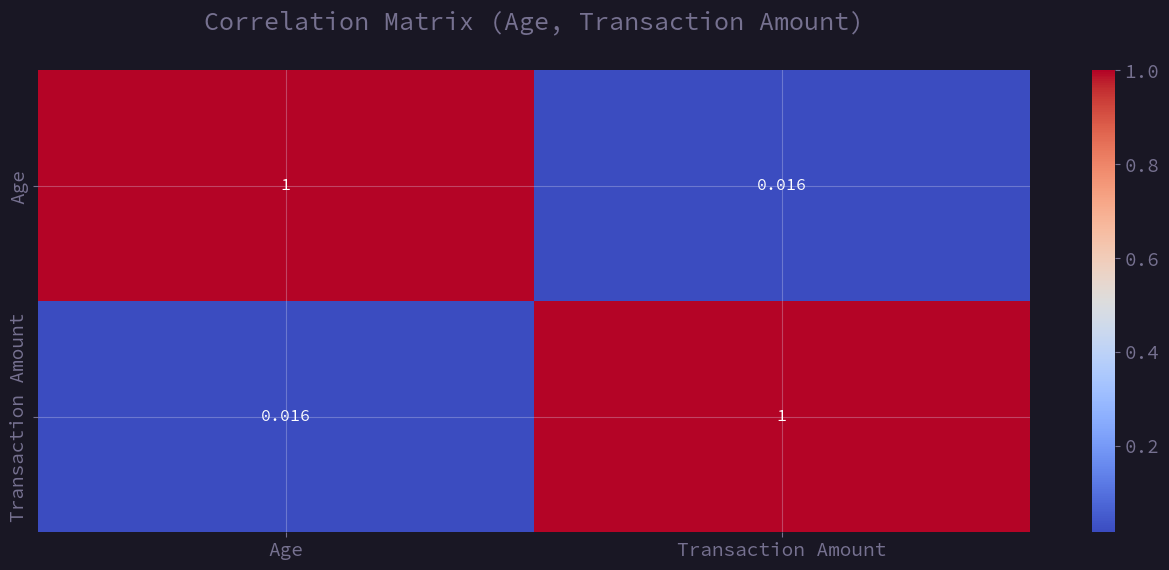

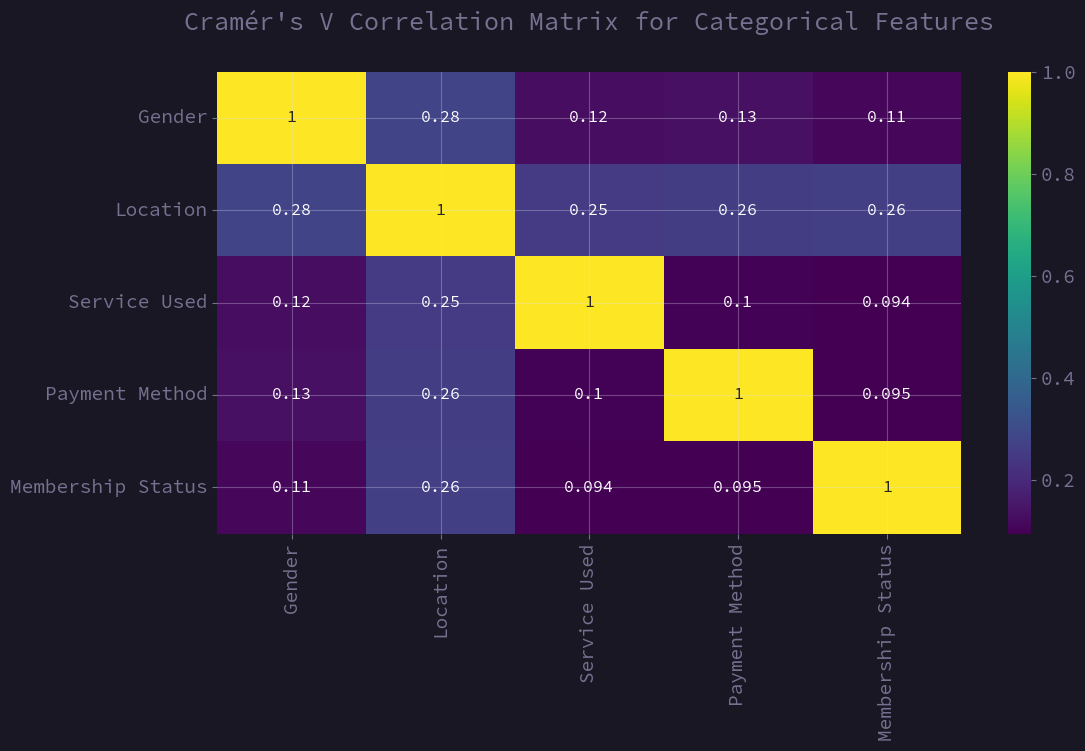

In [52]:
import scipy.stats as stats

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r-1, k-1))

# List of categorical columns
categorical_cols = ['Gender', 'Location', 'Service Used', 'Payment Method', 'Membership Status']

# Calculate Cramér's V for each pair of categorical columns
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis')
plt.title("Cramér's V Correlation Matrix for Categorical Features", pad=30)
plt.show()

In [53]:
def get_season(quarter):

    '''this function is to get season according to quarter column'''

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [54]:
df.head()

,First Name,Last Name,Email,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status,age_group
0,Cristi,Jerrome,cjerrome0@deviantart.com,Agender,32,115.186.14.16,Afghanistan,2022-09-08,Eva,124.48,Stripe,BRONZE,30-35
1,Bowie,Agge,bagge1@hubpages.com,Male,24,58.229.97.212,Sierra Leone,2022-12-29,STL 1,694.88,Stripe,BRONZE,24-29
2,Griz,Slayford,gslayford2@weebly.com,Male,24,33.120.228.123,Armenia,2022-10-24,Eva,441.05,Credit Card,GOLD,24-29
3,Erika,Matelaitis,ematelaitis3@com.com,Female,21,43.21.47.25,Armenia,2023-08-24,Eva,453.79,Stripe,IRON,18-23
4,Nester,Paulon,npaulon4@wix.com,Male,27,99.160.35.96,Armenia,2023-01-05,STL 1,287.75,Stripe,BRONZE,24-29


In [55]:
#correct df format of the 'date' column
#df ['date'] = pd.to_datetime(df['date'], format "%d-%m-%Y")

import calendar
# Create a new column "year" containing the year
df['year'] = df['Date of Transaction'].dt.year

#Create a new column "quarter" containing the season number
df['quarter'] = df['Date of Transaction'].dt.quarter

# Create a new column "season" containing the season
df['season'] = df['quarter'].apply(get_season)

#Create a new column "month" containing the month number
df['month'] = df['Date of Transaction'].dt.month

#Create a new column "month name" containing the month names
df['month_name'] = df['Date of Transaction'].dt.month_name()

#Create a new column "week" containing the week number
df['week'] = df['Date of Transaction'].dt.isocalendar().week

#Create a new column "day_of_week" containing the day names
df['day_of_week'] = df['Date of Transaction'].dt.day_name()

In [56]:
df.head()

,First Name,Last Name,Email,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status,age_group,year,quarter,season,month,month_name,week,day_of_week
0,Cristi,Jerrome,cjerrome0@deviantart.com,Agender,32,115.186.14.16,Afghanistan,2022-09-08,Eva,124.48,Stripe,BRONZE,30-35,2022,3,Summer,9,September,36,Thursday
1,Bowie,Agge,bagge1@hubpages.com,Male,24,58.229.97.212,Sierra Leone,2022-12-29,STL 1,694.88,Stripe,BRONZE,24-29,2022,4,Autumn,12,December,52,Thursday
2,Griz,Slayford,gslayford2@weebly.com,Male,24,33.120.228.123,Armenia,2022-10-24,Eva,441.05,Credit Card,GOLD,24-29,2022,4,Autumn,10,October,43,Monday
3,Erika,Matelaitis,ematelaitis3@com.com,Female,21,43.21.47.25,Armenia,2023-08-24,Eva,453.79,Stripe,IRON,18-23,2023,3,Summer,8,August,34,Thursday
4,Nester,Paulon,npaulon4@wix.com,Male,27,99.160.35.96,Armenia,2023-01-05,STL 1,287.75,Stripe,BRONZE,24-29,2023,1,Winter,1,January,1,Thursday


#### Time Series Analysis

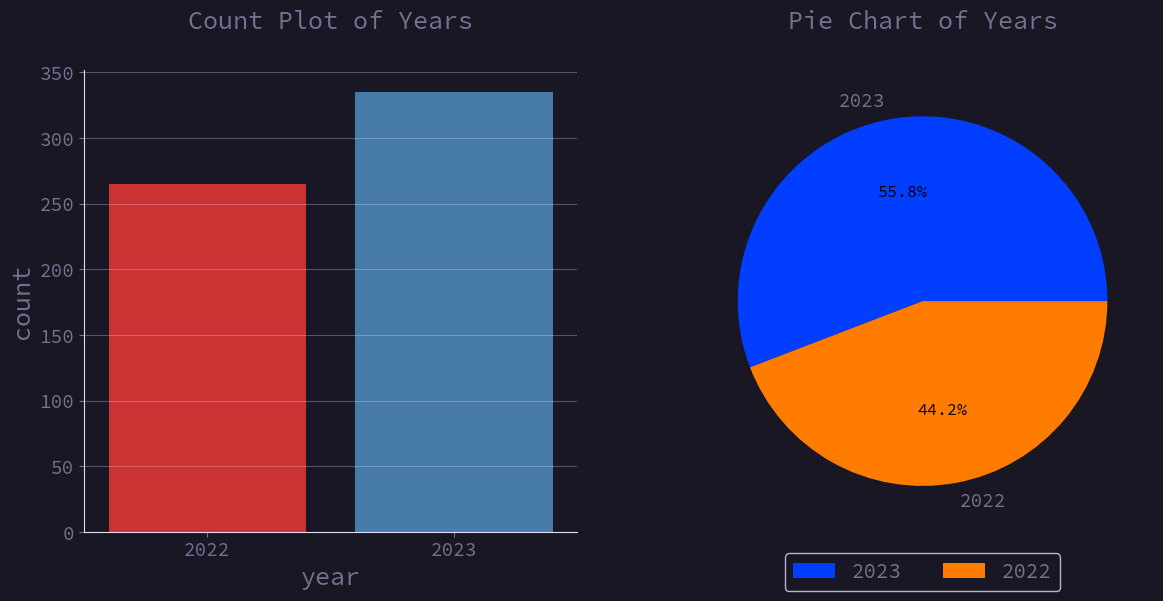

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'year', ax = ax[0], palette = 'Set1')

# Use the styled_pie_chart function for the pie chart
styled_pie_chart(ax[1], df['year'].value_counts().values, labels=df['year'].value_counts().index)

ax[0].set_title('Count Plot of Years', pad=30)
ax[1].set_title('Pie Chart of Years', pad=30)
# Create a legend for the pie chart at the bottom
ax[1].legend(df['year'].value_counts().index, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=15, markerscale=2)
plt.show()

In [58]:
df['season'].value_counts().sort_values(ascending=False)

season
Summer    181
Spring    159
Autumn    135
Winter    125
Name: count, dtype: int64

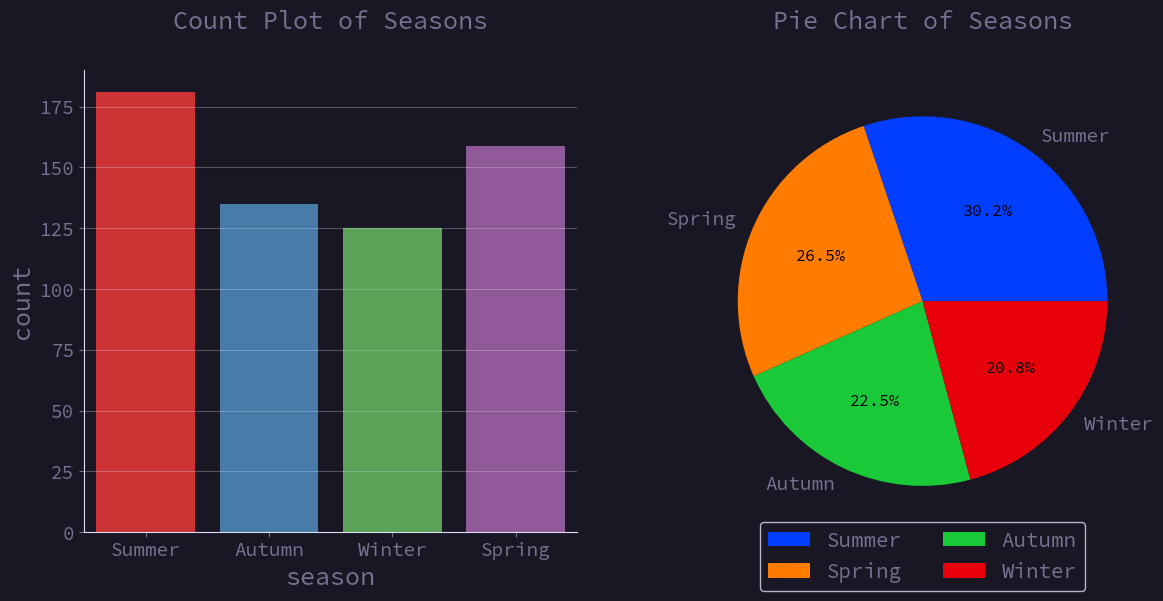

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.countplot(data = df, x = 'season', ax = ax[0], palette = 'Set1')

# Use the styled_pie_chart function for the pie chart
styled_pie_chart(ax[1], df['season'].value_counts().values, labels=df['season'].value_counts().index)

ax[0].set_title('Count Plot of Seasons', pad=30)
ax[1].set_title('Pie Chart of Seasons', pad=30)
# Create a legend for the pie chart at the bottom
ax[1].legend(df['season'].value_counts().index, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=15, markerscale=2)

plt.show()

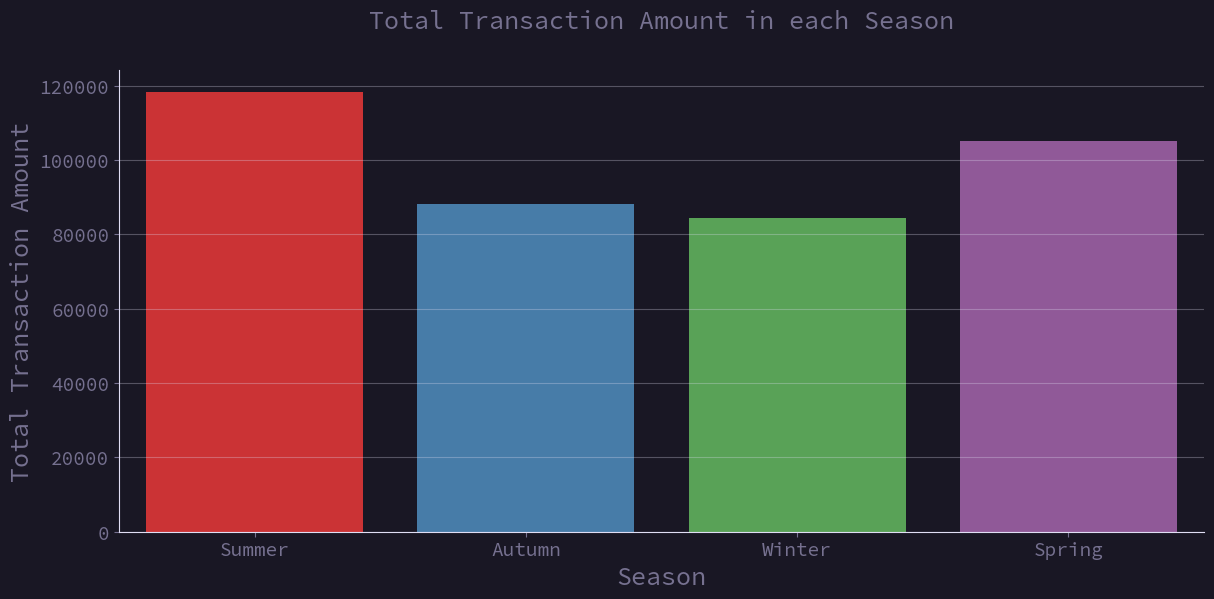

In [60]:
plt.figure(figsize = (14, 6))
sns.barplot(data=df,
            palette ='Set1',
            x = 'season',
            y = 'Transaction Amount',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Transaction Amount in each Season', pad=30)
plt.xlabel('Season')
plt.ylabel('Total Transaction Amount')
plt.show()

In [61]:
season_transaction =  df.groupby('season') ['Transaction Amount'].sum().sort_values(ascending = False)
season_transaction

season
Summer    118282.46
Spring    105164.03
Autumn     88128.00
Winter     84350.37
Name: Transaction Amount, dtype: float64

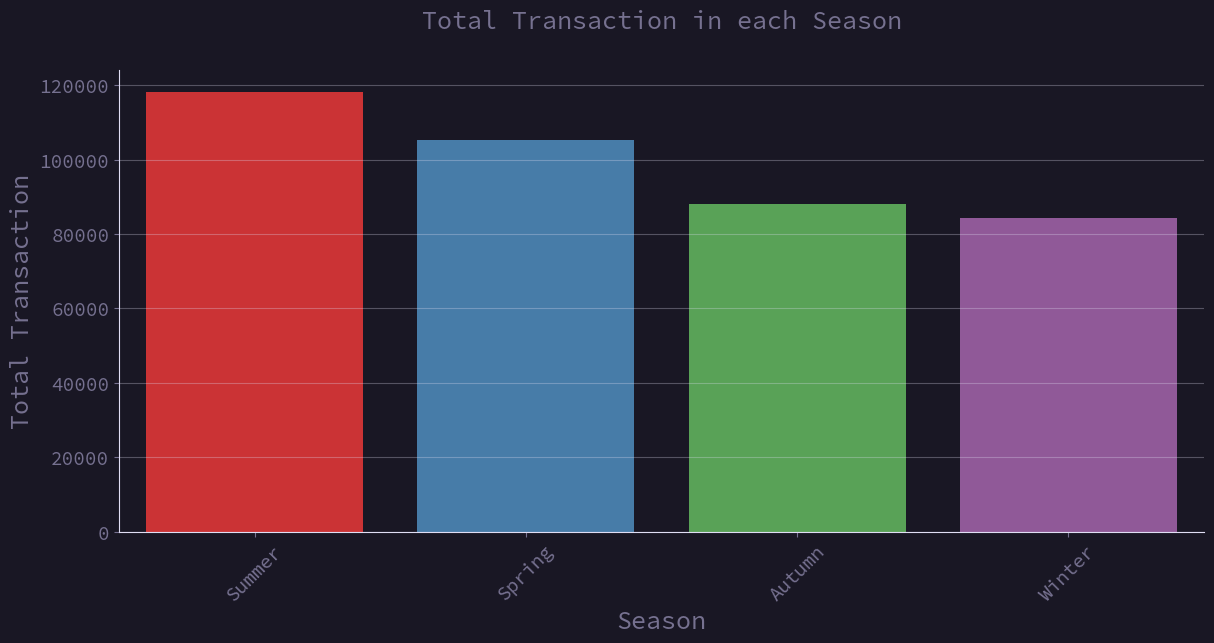

In [62]:
season_transaction =  df.groupby('season') ['Transaction Amount'].sum().sort_values(ascending = False)

plt.figure(figsize = (14, 6))
sns.barplot(data=df,
            palette ='Set1',
            x = 'season',
            y = 'Transaction Amount',
            order = season_transaction.index,
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Transaction in each Season', pad=30)
plt.xlabel('Season')
plt.xticks(rotation = 45)
plt.ylabel('Total Transaction')
plt.show()

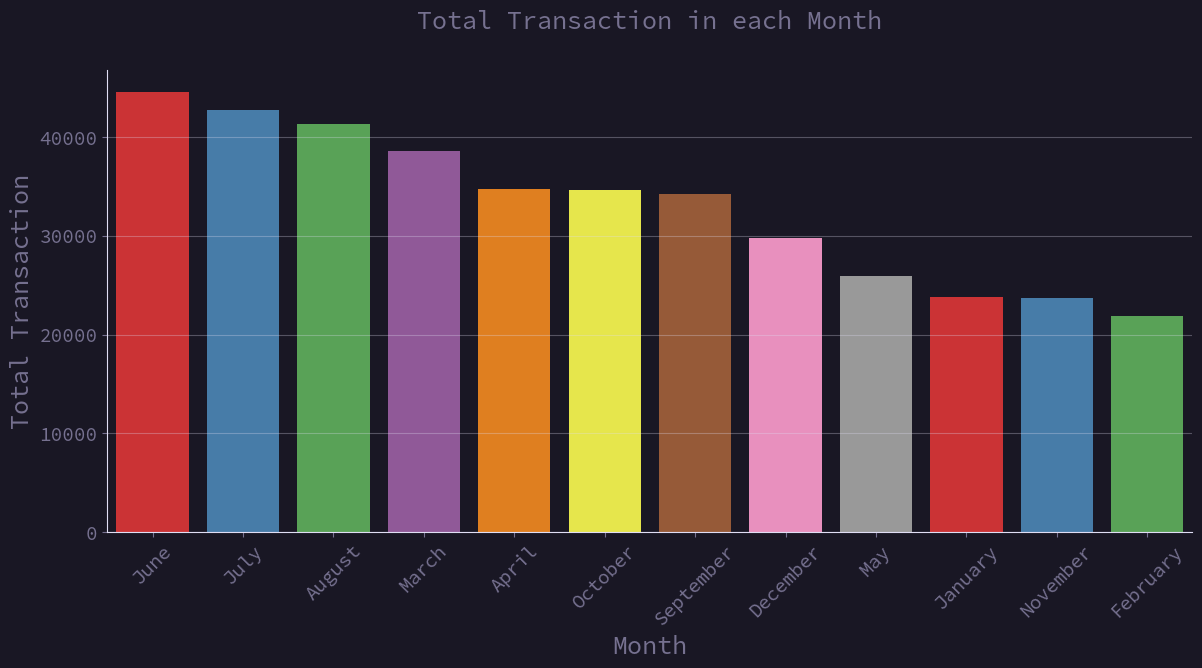

In [63]:
monthly_transaction =  df.groupby('month_name') ['Transaction Amount'].sum().sort_values(ascending = False)

plt.figure(figsize = (14, 6))
sns.barplot(data=df,
            palette ='Set1',
            x = 'month_name',
            y = 'Transaction Amount',
            order = monthly_transaction.index,
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Transaction in each Month', pad=30)
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('Total Transaction')
plt.show()

In [64]:
monthly_transaction

month_name
June         44526.52
July         42772.65
August       41305.44
March        38581.78
April        34740.55
October      34649.15
September    34204.37
December     29749.10
May          25896.96
January      23843.49
November     23729.75
February     21925.10
Name: Transaction Amount, dtype: float64

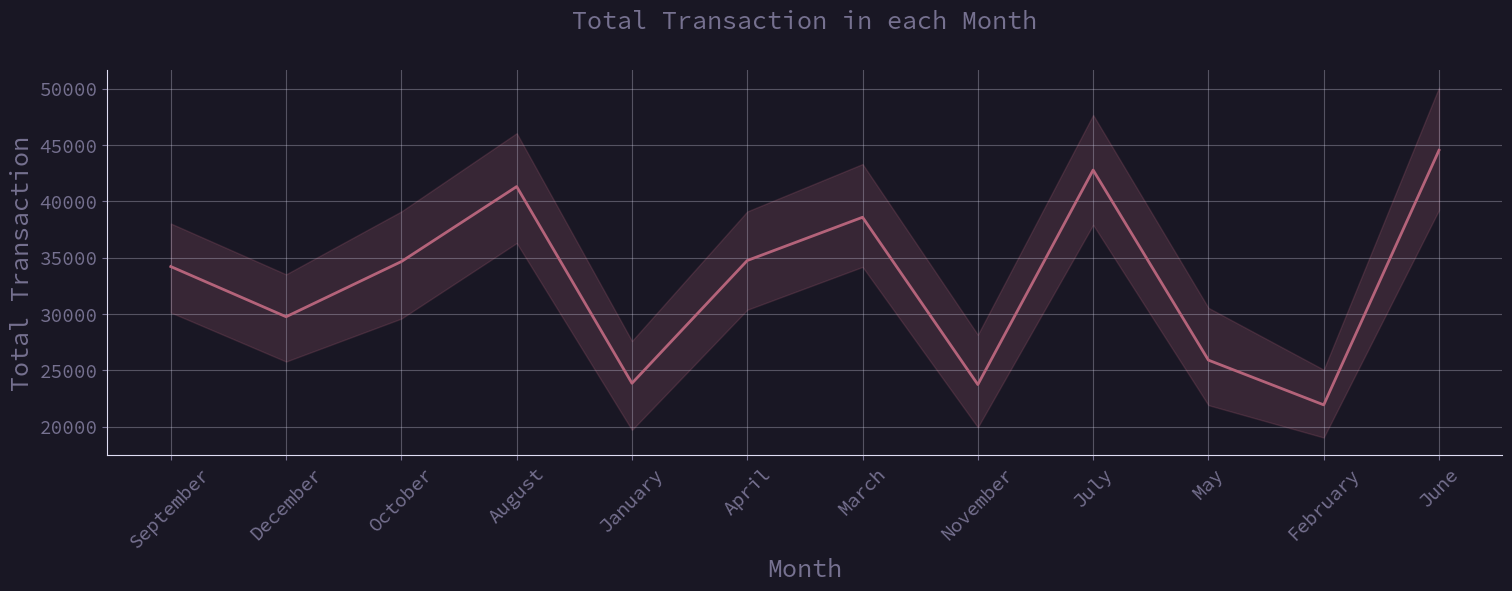

In [65]:
plt.figure(figsize = (18, 5))
sns.lineplot(data=df,
            x = 'month_name',
            y = 'Transaction Amount',
            estimator = np.sum, color='#b4637a')

plt.title('Total Transaction in each Month', pad=30)
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('Total Transaction')
plt.show()

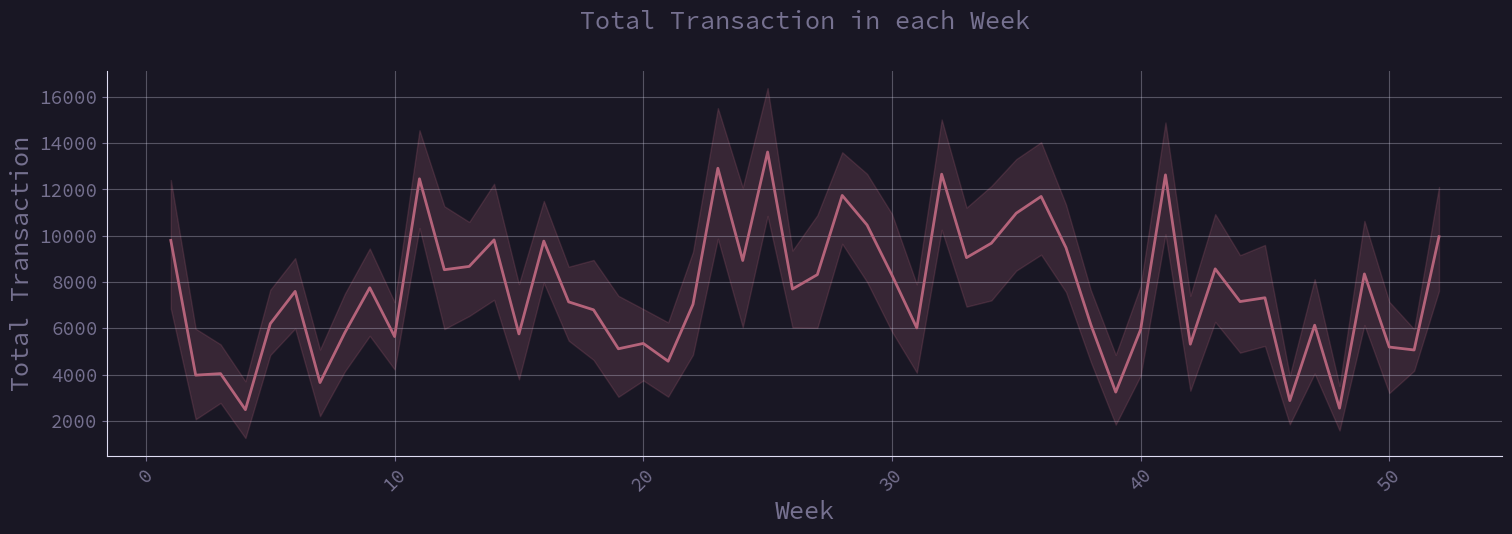

In [66]:
# Ensure 'week' is in the correct format
df['week'] = df['week'].astype(int)

plt.figure(figsize=(18, 5))
sns.lineplot(data=df,
             x = 'week',
             y = 'Transaction Amount',
             estimator = np.sum, color='#b4637a')

plt.title('Total Transaction in each Week', pad=30)
plt.xlabel('Week')
plt.xticks(rotation=45)
plt.ylabel('Total Transaction')
plt.show()

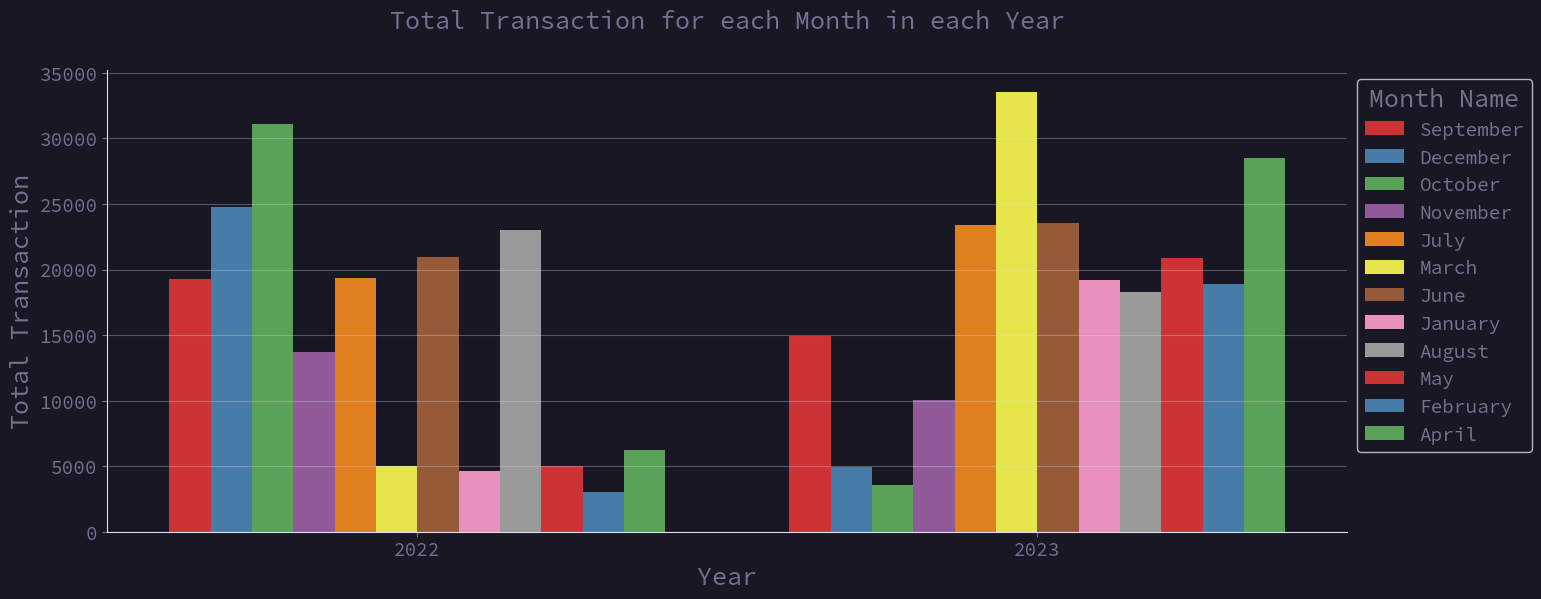

In [67]:
pd.pivot_table(data=df,
                index='year',
                columns='month_name',
                values='Transaction Amount',
                aggfunc='sum')

plt.figure(figsize=(16, 6))
sns.barplot(data=df,
            palette='Set1',
            x='year',
            y='Transaction Amount',
            hue='month_name',
            estimator=np.sum,
            ci=False)

# Add Labels and title
plt.title('Total Transaction for each Month in each Year', pad=30)
plt.xlabel('Year')
plt.ylabel("Total Transaction")

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Month Name', title_fontsize=18, fontsize=14)

plt.show()

In [68]:
pd.pivot_table(data=df,
                index='year',
                columns='month_name',
                values='Transaction Amount',
                aggfunc='sum').T

year,2022,2023
month_name,,
April,6228.68,28511.87
August,23052.25,18253.19
December,24803.85,4945.25
February,3045.19,18879.91
January,4621.43,19222.06
July,19370.57,23402.08
June,20952.03,23574.49
March,5015.89,33565.89
May,4985.51,20911.45


In [69]:
pd.pivot_table(data=df,
                index='year',
                columns='season',
                values='Transaction Amount',
                aggfunc='sum').T

year,2022,2023
season,,
Autumn,69632.96,18495.04
Spring,32166.22,72997.81
Summer,61689.00,56593.46
Winter,12682.51,71667.86


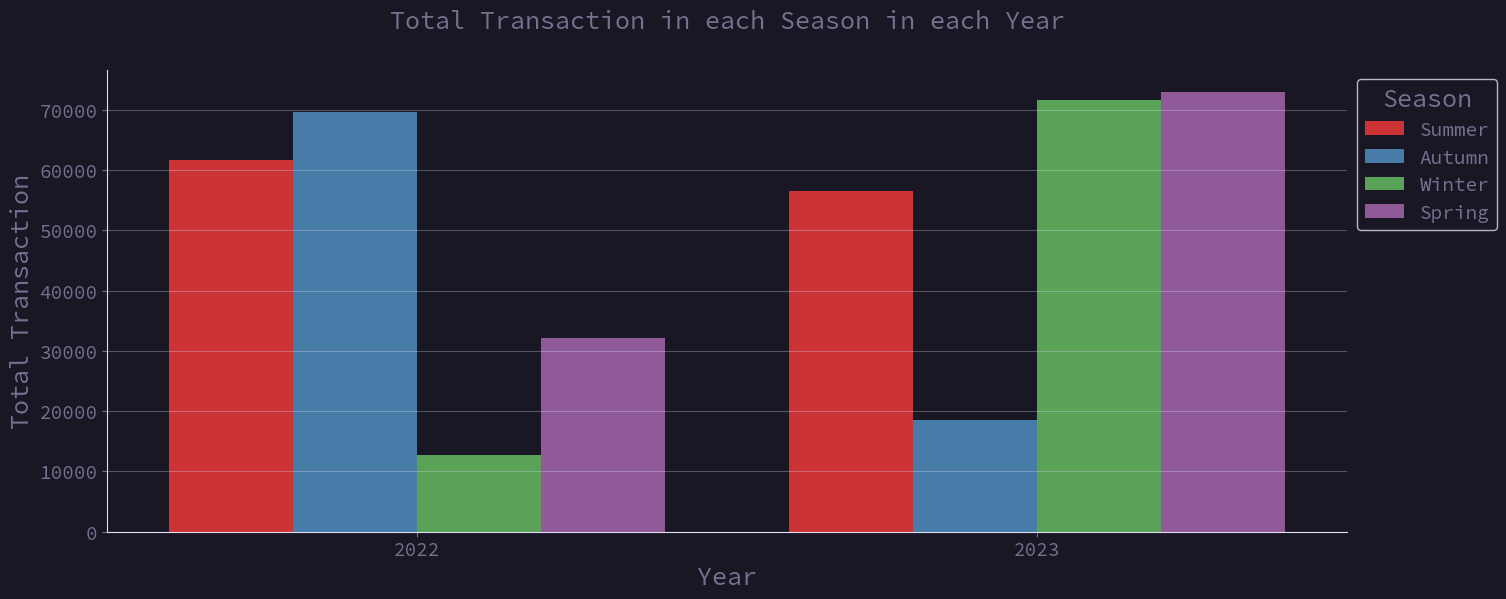

In [70]:
plt.figure(figsize = (16, 6))
sns.barplot(data=df,
            palette ='Set1',
            x = 'year',
            y = 'Transaction Amount',
            hue='season',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Transaction in each Season in each Year', pad=30)
plt.xlabel('Year')
plt.ylabel('Total Transaction')

# Move the legend outside the bar plot with larger title font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Season', title_fontsize=18, fontsize=14)

plt.show()

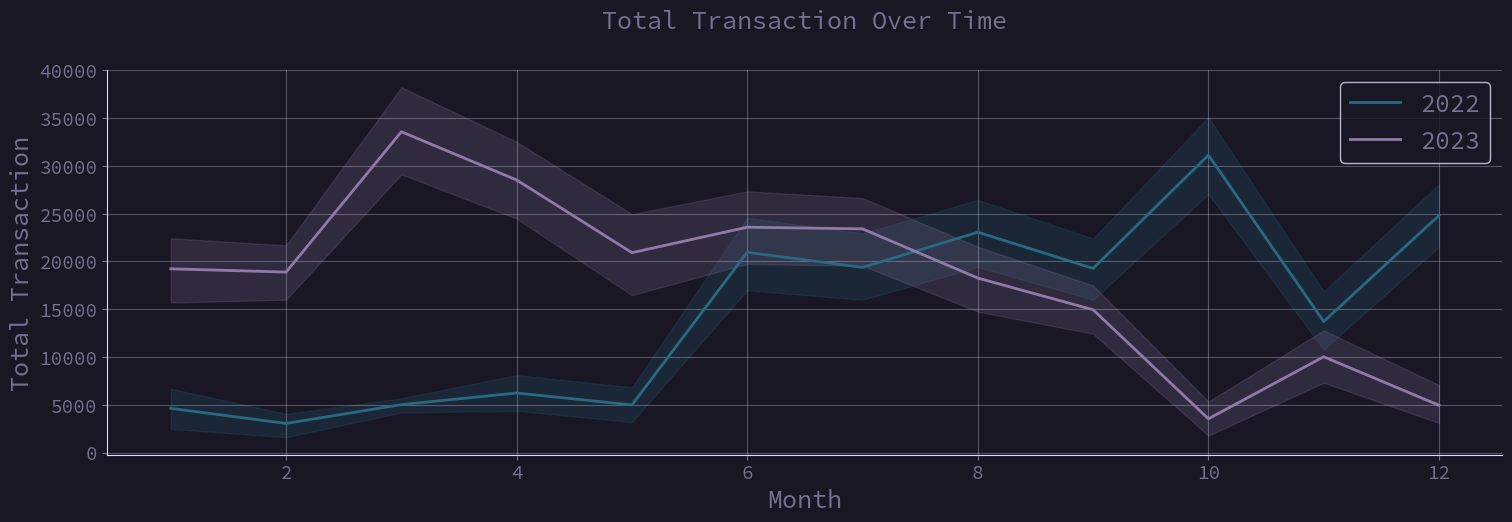

In [71]:
years = ['2022', '2023']
colors = ['#286983', '#907aa9']

plt.figure(figsize=(18, 5))
for i, year in enumerate(years):
    sns.lineplot(data=df[df['year'] == int(year)],
                 x='month',
                 y='Transaction Amount',
                 estimator=np.sum,
                 color=colors[i],
                 label=year)

# Add Labels and title
plt.title(f'Total Transaction Over Time', pad=30)
plt.xlabel('Month')
plt.ylabel('Total Transaction')

# Add a Legend
plt.legend()

# Show the plot
plt.show()

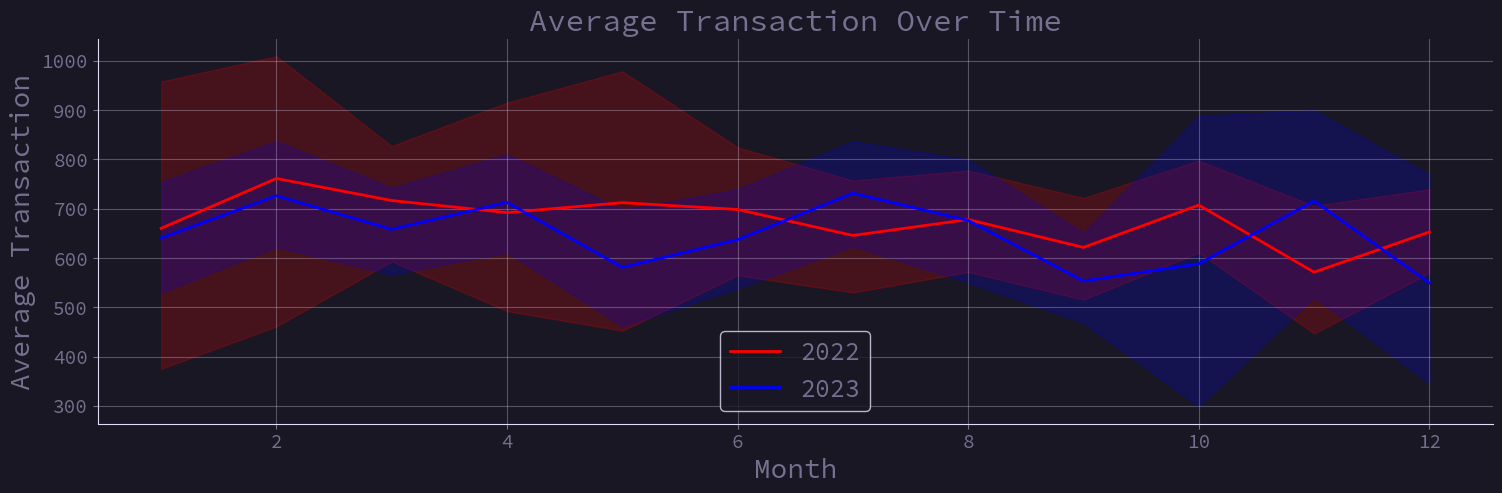

In [72]:
years = ['2022', '2023']
colors = ['red', 'blue']

plt.figure(figsize=(18, 5))
for i, year in enumerate(years):
    sns.lineplot(data=df[df['year'] == int(year)],
                 x='month',
                 y='Transaction Amount',
                 estimator=np.mean,
                 color=colors[i],
                 label=year)

# Add Labels and title
plt.title(f'Average Transaction Over Time', size=22)
plt.xlabel('Month', size=20)
plt.ylabel('Average Transaction', size=20)

# Add a Legend
plt.legend()

# Show the plot
plt.show()

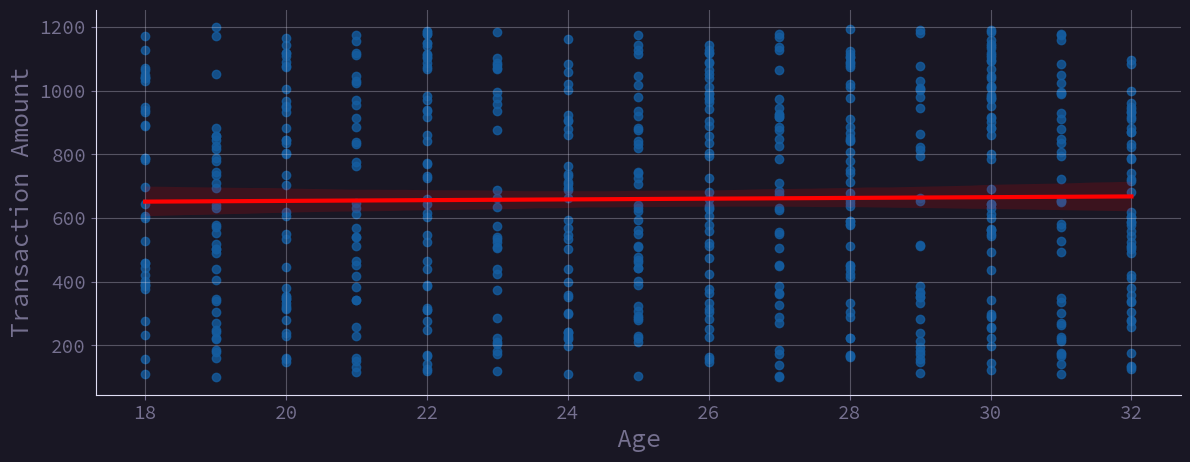

In [73]:
plt.figure(figsize=(14, 5))
sns.regplot(data=df, x='Age', y='Transaction Amount', color='#145DA0', line_kws={'color': 'red'})

# Show the plot
plt.show()

In [74]:
topCustomer=df.groupby("First Name")['Transaction Amount'].sum().sort_values(ascending=False)
topCustomer[:10]

First Name
Burton      1919.64
Titus       1840.37
Dolorita    1787.41
Perceval    1673.87
Averil      1666.74
Willi       1592.41
Chevy       1516.17
Joella      1503.77
Nicko       1198.88
Ken         1195.62
Name: Transaction Amount, dtype: float64

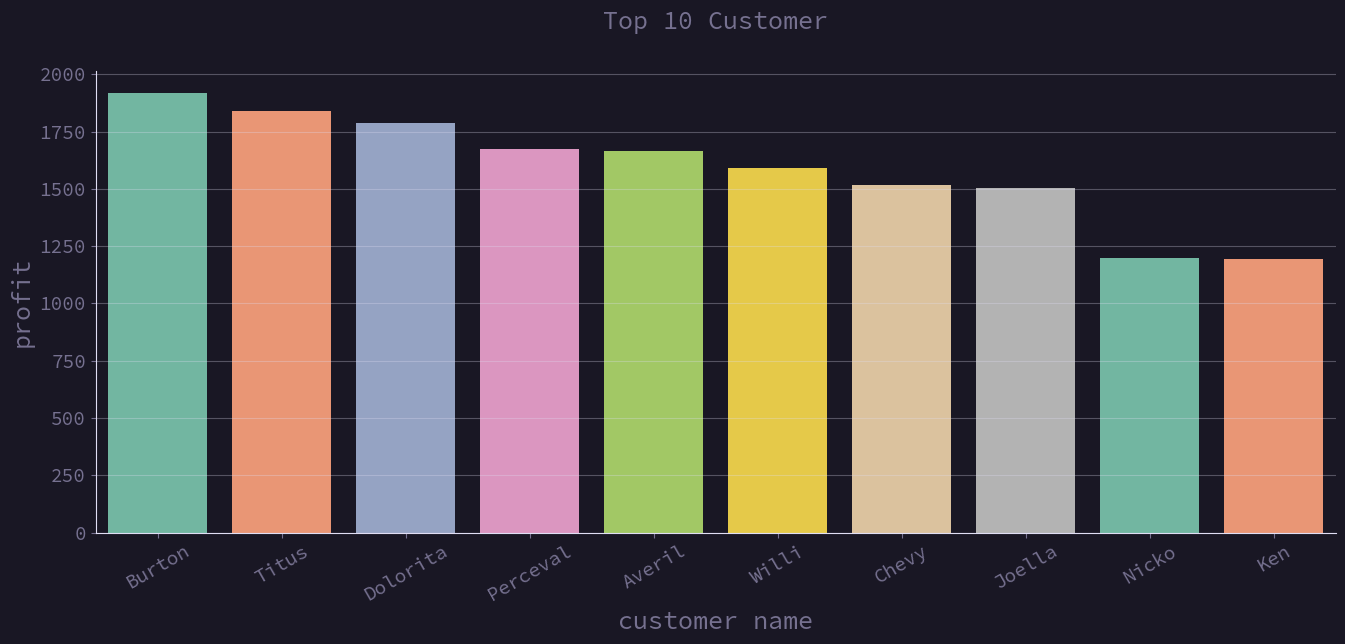

In [75]:
plt.figure(figsize=(16,6))
sns.barplot(x=topCustomer[:10].keys(),y=topCustomer[:10], palette='Set2')

plt.title("Top 10 Customer", pad=30)
plt.xlabel("customer name",)

plt.ylabel("profit")
plt.xticks (rotation=30)

plt.show()

In [76]:
# Sort the Dataframe by Transaction Amount in descending order
sorted_df = df.sort_values(by='Transaction Amount', ascending=False)

#Select the top 10 customers
top_10_customers = sorted_df.head(10)

# Get their first names, Last names, and email IDs
result = top_10_customers[['First Name', 'Last Name', 'Email']]

# Display the result
print(result)

    First Name    Last Name                         Email
183      Nicko       Carlon             ncarlon53@bbb.org
113      Norby         Tibb                ntibb35@va.gov
219   Rachelle       Wetton      rwetton63@wikispaces.com
481   Modestia      Gremane           mgremanedd@webs.com
27         Jae  Fritschmann       jfritschmannr@nymag.com
343      Aaren     Hattrick         ahattrick9j@exblog.jp
480      Yorgo      Tennock  ytennockdc@timesonline.co.uk
423       Zita     Hemshall            zhemshallbr@w3.org
411      Kacie    Antcliffe      kantcliffebf@cbsnews.com
493    Farrand    Geraldini    fgeraldinidp@indiegogo.com


In [77]:
df['Last Name'].value_counts()

Last Name
Tattersall     2
Blinckhorne    2
Ech            2
Smithson       2
Monksfield     1
              ..
Wait           1
Gowing         1
Hardie         1
Polet          1
Absalom        1
Name: count, Length: 596, dtype: int64

In [78]:
growth = df.groupby("year")['Transaction Amount'].sum()
growth

year
2022    176170.69
2023    219754.17
Name: Transaction Amount, dtype: float64

In [79]:
ys = pd.Series([176170.69, 219754.14])
ys.pct_change()

0         NaN
1    0.247393
dtype: float64

In [80]:
ys.pct_change() * 100

0          NaN
1    24.739331
dtype: float64